# FIT5196 Assesment 1
#### Student Name: Arushi Tejpal
#### Student ID: 28130006
Date: 15/11/2020
Version: 0.1 
Envrionment: Python 3.6.0 Anaconda 

Libraries used: 
 - pandas 
 - geopandas
 - tubula
 - sklearn 
 - seaborn 
 - beautifulsoup 
 - numpy
 - scipy.stats
 - matplotlib


## 1. Introduction 
This assignment we are to integrate the input data sets into one data set as required in the assignment spec. 
We will also look at data re shaping with transformation, normality, data linearlity as well as data scaling. 




## Table of contents: 
##### TASK 1 
* [section 1.1](#sec1) Importing Libraries 
    * [section 1.2](#sec1.2)  TASK 1 
    * [section 1.3](#sec1.3)  Read supermarkets data from PDF 
    * [section 1.4](#sec1.4)  Read  xml
    * [section 1.5](#sec1.5)  read hospital.html 
    * [section 1.6](#sec1.6)  read real_state json 
    * [section 1.7](#sec1.7)  read shoppingcenters.xlsx 
    * [section 1.8](#sec1.8)  Read PTV data from txt files with csv format 
    * [section 1.9](#sec1.9)  Joining xml and json real_state files 
   * [section 1.10](#sec1.10)  getting suburbs using geopandas and shape files
*  [section 1.11](#sec1.11)   calculating distance 
*  [section 1.12](#sec1.12) Calculating shopping_center_id and Distance _to_sc
*  [section 1.13](#sec1.13) Calculating nearest Hospital_id and Distance_to_hospital
*  [section 1.14](#sec1.14) Calculating nearest Supermarket_id and its Distance_to_supermaket
*  [section 1.15](#sec1.15) Getting nearest Train_station_id  and its Distance_to_train_station using PTV data
*  [section 1.16](#sec1.16) calculating travel_min_to_CBD and Transfer_flag 
* [section 1.17](#sec1.17)  finished file

##### Task 2 
 * [section 2.1](#sec2.1) TASK 2 
    * [section 2.2](#sec2.2)  scaling
    * [section 2.3](#sec2.3)  min max normalisation 
    * [section 2.4](#sec2.4)  Data transformation 
    * [section 2.5](#sec2.5)  Linearlity 
 
 * [section 2.6](#sec2.6)  Bibliography 
    

# Importing  Libraries <a class="anchor" id="sec1.1"></a> 

In [1]:
import pandas as pd
import numpy as np

# Task 1: Data Integration <a class="anchor" id="sec1.2"></a>  

## Read Data from files and create Datasets

## Read supermarkets data from PDF <a class="anchor" id="sec1.3"></a> 

In [2]:
#!pip install tabula.py
#https://aegis4048.github.io/parse-pdf-files-while-retaining-structure-with-tabula-py
#https://hackersandslackers.com/data-from-pdfs-tabula-pandas/
import tabula
from tabula import read_pdf

##### After we read supermarkets.pdf we need to concatinate the list into a dataframe, by removing the page gap. 

In [3]:
df_supermarkets=read_pdf("./supermarkets.pdf",pages='all')
##concating to remove page gaps
df_supermarkets = pd.concat(df_supermarkets[x] for x in range(len(df_supermarkets)))
df_supermarkets

,Unnamed: 0,id,lat,lng,type
0,0,S_001,-37.883978,144.735287,Woolworths
1,1,S_002,-41.161591,147.514797,Woolworths
2,2,S_003,-37.984078,145.077167,Woolworths
3,3,S_004,-37.707023,144.938740,Woolworths
4,4,S_005,-37.597670,144.938413,Woolworths
...,...,...,...,...,...
40,234,S_235,-37.860188,145.028920,Coles
41,235,S_236,-37.875984,144.614490,Coles
42,236,S_237,-37.047330,143.744610,Coles
43,237,S_238,-38.351648,144.922881,Coles


## Read data of real_state XML file for property info <a class="anchor" id="sec1.4"></a> 

#### First we need to remove the error which is:  "b",   " ' "  which is at the begining of the file. Without this step the program will not be able to read the xml file. 

In [4]:
with open("./real_state.xml", 'r', encoding='utf8', errors='ignore') as infile, open('./real_state_fix.xml', 'w', encoding='utf8') as outfile:
    temp = infile.read().replace("b\'", "",1)
    outfile.write(temp)

We have now fixed  error of the xml file and named it  real_state_fix.xml 

In [5]:
from lxml import etree

path = "./real_state_fix.xml"
parser = etree.XMLParser(encoding='utf-8',recover=True)
ltree=etree.parse(open(path),parser=parser)
root = ltree.getroot()

##### This function is showing how many elements the xml file has 
##### " property_id , lat, lng, addr_street, proce, property_type, year, bedrooms, bathrooms, parking_space" 
##### are all found in the xml file. 

In [6]:
root.getchildren()

[<Element property_id at 0x11c671f80>,
 <Element lat at 0x11c671f00>,
 <Element lng at 0x11c671380>,
 <Element addr_street at 0x11c671a40>,
 <Element price at 0x11c671040>,
 <Element property_type at 0x11c6714c0>,
 <Element year at 0x11c6719c0>,
 <Element bedrooms at 0x11c671700>,
 <Element bathrooms at 0x11c6c3380>,
 <Element parking_space at 0x11c671940>]

###### Now that we know each element in the xml file we are able to convert the xml file into a dataframe 

In [7]:
length=len(root.getchildren())
#length #10
list_of_cols=[]
for elem in root.getchildren():
    list_of_cols.append(elem.tag)

#list_of_cols
records = []
for idy in range(length):
    record = {}
    uploaddate = []
    for elem in root.getchildren()[idy].getchildren():
        uploaddate.append(elem.text)  

    record[list_of_cols[idy]] = uploaddate
    records.append(record)

#records
df_real_state_xml=pd.DataFrame()

for i in range(len(records)):
    df_real_state_xml[list_of_cols[i]]=list(records[i][list_of_cols[i]])


df_real_state_xml

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space
0,66910,-37.75201416,145.35758969999998,11 Allison Crescent,2610000,house,2009,3,1,2
1,40625,-37.705989,145.073302,41 Lea Crescent,7910000,house,2015,3,1,3
2,64646,-37.816775,145.287524,532 Dorset Road,4998000,house,2011,3,1,1
3,39215,-37.752478,145.045595,365 Waterdale Road,6900000,house,2010,2,1,0
4,28141,-37.800304,144.9758676,18 Cremorne Street,12250000,house,2013,3,2,0
...,...,...,...,...,...,...,...,...,...,...
1002,38182,-37.768131,145.019584,272 Station Street,25160000,house,2016,3,1,2
1003,18843,-37.687283,144.930507,40 Gerbert Street,3965000,house,2011,3,1,0
1004,71482,-37.854696999999994,145.237471,37 Amesbury Avenue,5170000,house,2012,3,1,1
1005,96183,-37.92334366,145.0354767,71 North Avenue,4620000,house,2006,3,1,1


## Read data for hospitals from html file <a class="anchor" id="sec1.5"></a>

#### Now we will work on the hospital.html file and convert it into a df 

* we will use beautifulsoup for reading html file


In [8]:
from bs4 import BeautifulSoup

In [9]:
path = 'hospitals.html'
ecj_data = open(path,'r').read()
soup = BeautifulSoup(ecj_data)

* We will find the attributes for the dataframe 
* from inspecting the html file i was able to extract and find out what was in  the table and class 

In [10]:
tabe = soup.find("table", {"class" : "dataframe"})

* From this function we can find the header of the dataframe 

In [11]:
column_headers = []
for row in tabe.find('thead').find_all('th'):
    #print( row.string)
    column_headers.append(row.string)
column_headers

[None, 'id', 'lat', 'lng', 'name']

In [12]:
column_headers = column_headers[1:]
column_headers

['id', 'lat', 'lng', 'name']

* Skipping the "none" coloumn we will go through each coloumn and find the data through the tags such as "tbody", "tr", "td". 
* From this we are able to create a data frame with "id, lat, lng name" 

In [13]:
records = []
for idy, row in enumerate(tabe.find('tbody').find_all('tr')):
    if idy == 0:
        continue
    cols = row.findAll('td')
    record = {}
    for idx, col in enumerate(cols):
        record[column_headers[idx]] = col.text.strip()
    records.append(record)

df_hospitals = pd.DataFrame.from_dict(records)

df_hospitals[column_headers]

,id,lat,lng,name
0,hospital_002,-37.855469,145.268183,Mountain District Private Hospital
1,hospital_003,-37.792230,144.889128,Western Hospital
2,hospital_004,-37.756042,145.061896,Mercy Hospital for Women
3,hospital_005,-37.760623,144.815624,Sunshine Hospital
4,hospital_006,-36.359274,145.410832,Shepparton Private Hospital
...,...,...,...,...
193,hospital_195,-38.234091,146.406812,Maryvale Private Hospital
194,hospital_196,-37.837972,144.996182,South Yarra Clinic
195,hospital_197,-37.798231,144.957169,Prof George Andrew Varigos Specialist Practice
196,hospital_198,-37.910968,144.990415,Mr Harry Clitherow - Orthopaedic Surgeon


## Read real_state data from json file <a class="anchor" id="sec1.6"></a>

* Now we will read the real_state.json file through pandas. 

In [14]:
df_real_state_json = pd.read_json("./real_state.json")
df_real_state_json

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space
0,85017,-37.886332,144.983051,53 Ormond Esplanade,14220000,house,2010,3,3,2
1,26926,-37.603686,144.932143,42 Gillingham Crescent,3015000,house,2013,3,1,0
2,7003,-37.785885,144.838574,78 Devonshire Road,6084000,house,2014,3,1,0
3,27841,-37.581293,144.905201,80 Grevillea Street,6480000,house,2016,3,2,1
4,82075,-37.984570,145.235792,3 Peach Court,4290000,house,2011,3,1,1
...,...,...,...,...,...,...,...,...,...,...
1005,83548,-37.854483,144.994772,15 Primrose Street,16100000,house,2014,2,2,0
1006,41071,-37.697848,145.046833,7 Latrobe Avenue,8075000,house,2012,4,2,2
1007,19407,-37.657482,144.931870,32 Pearson Crescent,4260000,house,2016,3,1,2
1008,53826,-37.828506,144.992264,82 Cubitt Street,7560000,house,2009,3,2,0


## Read Shopping center data set from xlsx <a class="anchor" id="sec1.7"></a>
* Read shopingcenters.xlsx file using pd.ExcelFile and then parse file to create a dataframe.

In [15]:
excel= pd.ExcelFile('shopingcenters.xlsx')
df_shopping_centers = excel.parse()
df_shopping_centers

,Unnamed: 0,sc_id,lat,lng
0,0,SC_001,-37.767915,145.041790
1,1,SC_002,-37.819375,145.171472
2,2,SC_003,-37.971131,145.089065
3,3,SC_004,-35.280406,149.132550
4,4,SC_005,-37.574572,144.920452
...,...,...,...,...
114,114,SC_115,-38.014916,145.323404
115,115,SC_116,43.105259,-76.091619
116,116,SC_117,-38.005454,145.217572
117,117,SC_118,-37.486265,144.589067


## Read PTV Data from txt files with csv format <a class="anchor" id="sec1.8"></a>

#### We will create df using pd.read_csv for : 
* GTFS - Melbourne Train Information/routes.txt  
* GTFS - Melbourne Train Information/stops.txt
* GTFS - Melbourne Train Information/agency.txt
* GTFS - Melbourne Train Information/calendar_dates.txt
* GTFS - Melbourne Train Information/calendar.txt 
* GTFS - Melbourne Train Information/shapes.txt 
* GTFS - Melbourne Train Information/stop_times.txt
* GTFS - Melbourne Train Information/trips.txt

In [16]:
ptvdf_routes = pd.read_csv("./GTFS - Melbourne Train Information/routes.txt")
#type(ptvdf)
ptvdf_routes

,route_id,agency_id,route_short_name,route_long_name,route_type
0,2-ALM-B-mjp-1,1,Alamein,Alamein - City (Flinders Street),2
1,2-ALM-C-mjp-1,1,Alamein,Alamein - City (Flinders Street),2
2,2-ALM-D-mjp-1,1,Alamein,Alamein - City (Flinders Street),2
3,2-ALM-E-mjp-1,1,Alamein,Alamein - City (Flinders Street),2
4,2-ALM-F-mjp-1,1,Alamein,Alamein - City (Flinders Street),2
...,...,...,...,...,...
76,2-WMN-B-mjp-1,1,Williamstown,Williamstown - City (Flinders Street),2
77,2-WMN-C-mjp-1,1,Williamstown,Williamstown - City (Flinders Street),2
78,2-WMN-D-mjp-1,1,Williamstown,Williamstown - City (Flinders Street),2
79,2-WMN-E-mjp-1,1,Williamstown,Williamstown - City (Flinders Street),2


In [17]:
ptvdf_stops = pd.read_csv("./GTFS - Melbourne Train Information/stops.txt")
ptvdf_stops

,stop_id,stop_name,stop_short_name,stop_lat,stop_lon
0,15351,Sunbury Railway Station,Sunbury,-37.579091,144.727319
1,15353,Diggers Rest Railway Station,Diggers Rest,-37.627017,144.719922
2,19827,Stony Point Railway Station,Crib Point,-38.374235,145.221837
3,19828,Crib Point Railway Station,Crib Point,-38.366123,145.204043
4,19829,Morradoo Railway Station,Crib Point,-38.354033,145.189602
...,...,...,...,...,...
213,44817,Coolaroo Railway Station,Coolaroo,-37.661003,144.926056
214,45793,Lynbrook Railway Station,Lynbrook,-38.057341,145.249275
215,45794,Cardinia Road Railway Station,Pakenham,-38.071290,145.437791
216,45795,South Morang Railway Station,South Morang,-37.649159,145.067032


In [18]:
ptvdf_agency = pd.read_csv("./GTFS - Melbourne Train Information/agency.txt")
ptvdf_agency

,agency_id,agency_name,agency_url,agency_timezone,agency_lang
0,1,PTV,http://www.ptv.vic.gov.au,Australia/Melbourne,EN


In [19]:
ptvdf_calendar_dates = pd.read_csv("./GTFS - Melbourne Train Information/calendar_dates.txt")
ptvdf_calendar_dates

,service_id,date,exception_type
0,T0,20151103,2
1,T0+a5,20151103,2


In [20]:
ptvdf_calendar = pd.read_csv("./GTFS - Melbourne Train Information/calendar.txt")
ptvdf_calendar

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,T2,0,0,0,0,0,1,0,20151009,20151011
1,UJ,0,0,0,0,0,0,1,20151009,20151011
2,T6,0,0,0,0,1,0,0,20151009,20151011
3,T5,1,1,1,1,0,0,0,20151012,20151015
4,T2_1,0,0,0,0,0,1,0,20151016,20151018
5,UJ_1,0,0,0,0,0,0,1,20151016,20151018
6,T6_1,0,0,0,0,1,0,0,20151016,20151018
7,T5_1,1,1,1,1,0,0,0,20151019,20151022
8,T0,1,1,1,1,1,0,0,20151023,20151122
9,T2_2,0,0,0,0,0,1,0,20151023,20151122


In [21]:
ptvdf_shapes = pd.read_csv("./GTFS - Melbourne Train Information/shapes.txt")
ptvdf_shapes

,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence,shape_dist_traveled
0,2-ain-mjp-1.1.H,-37.818631,144.951994,1,0.000000
1,2-ain-mjp-1.1.H,-37.817425,144.951050,2,157.543645
2,2-ain-mjp-1.1.H,-37.817241,144.950828,3,185.827916
3,2-ain-mjp-1.1.H,-37.816327,144.950047,4,308.469671
4,2-ain-mjp-1.1.H,-37.816127,144.949950,5,332.239399
...,...,...,...,...,...
339706,2-WMN-F-mjp-1.6.R,-37.864271,144.895021,17,2655.879090
339707,2-WMN-F-mjp-1.6.R,-37.864818,144.896370,18,2789.160747
339708,2-WMN-F-mjp-1.6.R,-37.867094,144.903228,19,3443.379365
339709,2-WMN-F-mjp-1.6.R,-37.867382,144.904208,20,3535.406535


In [22]:
ptvdf_stop_times = pd.read_csv("./GTFS - Melbourne Train Information/stop_times.txt")
ptvdf_stop_times

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
0,17182517.T2.2-ALM-B-mjp-1.1.H,04:57:00,04:57:00,19847,1,NaN,0,0,0.000000
1,17182517.T2.2-ALM-B-mjp-1.1.H,04:58:00,04:58:00,19848,2,NaN,0,0,723.017818
2,17182517.T2.2-ALM-B-mjp-1.1.H,05:00:00,05:00:00,19849,3,NaN,0,0,1951.735072
3,17182517.T2.2-ALM-B-mjp-1.1.H,05:02:00,05:02:00,19850,4,NaN,0,0,2899.073349
4,17182517.T2.2-ALM-B-mjp-1.1.H,05:04:00,05:04:00,19851,5,NaN,0,0,3927.090952
...,...,...,...,...,...,...,...,...,...
390300,17199140.UJ.2-ain-mjp-1.4.R,18:09:00,18:09:00,20028,1,NaN,0,0,0.000000
390301,17199140.UJ.2-ain-mjp-1.4.R,18:15:00,18:15:00,19973,4,NaN,0,0,4011.161109
390302,17199140.UJ.2-ain-mjp-1.4.R,18:19:00,18:19:00,22180,5,NaN,0,0,5676.741894
390303,17199142.T2.2-ain-mjp-1.5.R,24:00:00,24:00:00,20027,1,NaN,0,0,0.000000


In [23]:
ptvdf_trips = pd.read_csv("./GTFS - Melbourne Train Information/trips.txt")
ptvdf_trips

,route_id,service_id,trip_id,shape_id,trip_headsign,direction_id
0,2-ALM-F-mjp-1,T0,17067982.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
1,2-ALM-F-mjp-1,T0,17067988.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
2,2-ALM-F-mjp-1,T0,17067992.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
3,2-ALM-F-mjp-1,T0,17067999.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
4,2-ALM-F-mjp-1,T0,17068003.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
...,...,...,...,...,...,...
23804,2-WMN-F-mjp-1,UJ_2,17072252.UJ.2-WMN-F-mjp-1.6.R,2-WMN-F-mjp-1.6.R,Williamstown,1
23805,2-WMN-F-mjp-1,UJ_2,17072256.UJ.2-WMN-F-mjp-1.6.R,2-WMN-F-mjp-1.6.R,Williamstown,1
23806,2-WMN-F-mjp-1,UJ_2,17072260.UJ.2-WMN-F-mjp-1.6.R,2-WMN-F-mjp-1.6.R,Williamstown,1
23807,2-WMN-F-mjp-1,UJ_2,17072264.UJ.2-WMN-F-mjp-1.6.R,2-WMN-F-mjp-1.6.R,Williamstown,1


## Joining datasets  <a class="anchor" id="sec1.9"></a> 
* Now we will combine the xml and json real_state files into one data frame. 

In [24]:
#https://www.datacamp.com/community/tutorials/joining-dataframes-pandas
#https://datacarpentry.org/python-ecology-lesson/05-merging-data/index.html
#https://www.youtube.com/watch?v=AtyRmWdGhHE    ##geopandas geopye

In [25]:
df_real_state=pd.concat([df_real_state_xml,df_real_state_json])
df_real_state #1010 +1007=2017 rows

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space
0,66910,-37.75201416,145.35758969999998,11 Allison Crescent,2610000,house,2009,3,1,2
1,40625,-37.705989,145.073302,41 Lea Crescent,7910000,house,2015,3,1,3
2,64646,-37.816775,145.287524,532 Dorset Road,4998000,house,2011,3,1,1
3,39215,-37.752478,145.045595,365 Waterdale Road,6900000,house,2010,2,1,0
4,28141,-37.800304,144.9758676,18 Cremorne Street,12250000,house,2013,3,2,0
...,...,...,...,...,...,...,...,...,...,...
1005,83548,-37.8545,144.995,15 Primrose Street,16100000,house,2014,2,2,0
1006,41071,-37.6978,145.047,7 Latrobe Avenue,8075000,house,2012,4,2,2
1007,19407,-37.6575,144.932,32 Pearson Crescent,4260000,house,2016,3,1,2
1008,53826,-37.8285,144.992,82 Cubitt Street,7560000,house,2009,3,2,0


* showing duplicated rows

In [26]:
df_real_state[((df_real_state.duplicated(['property_id'],keep=False)))]

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space
62,54103,-37.8139,145.025,14 Edgerton Street,18840000,house,2014,3,2,1
66,73043,-37.8568,145.268,169 Scoresby Road,11488000,house,2015,3,2,2
285,54103,-37.8139,145.025,14 Edgerton Street,18840000,house,2014,3,2,1
378,32494,-37.7428,145.008,287 Plenty Road,7327000,house,2013,3,1,0
471,32494,-37.7428,145.008,287 Plenty Road,7327000,house,2013,3,1,0
520,73043,-37.8568,145.268,169 Scoresby Road,11488000,house,2015,3,2,2
838,94191,-38.0737,145.128,32 Melaleuca Drive,5640000,house,2013,3,1,2
940,94191,-38.0737,145.128,32 Melaleuca Drive,5640000,house,2013,3,1,2


* Removing duplicated rows

In [27]:
# Dropping Last duplicte values so removing 4 out of 8
df_real_state.drop_duplicates(subset ='property_id',keep='last',inplace = True)

In [28]:
df_real_state.reset_index(inplace=True, drop=True) 
df_real_state

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space
0,66910,-37.75201416,145.35758969999998,11 Allison Crescent,2610000,house,2009,3,1,2
1,40625,-37.705989,145.073302,41 Lea Crescent,7910000,house,2015,3,1,3
2,64646,-37.816775,145.287524,532 Dorset Road,4998000,house,2011,3,1,1
3,39215,-37.752478,145.045595,365 Waterdale Road,6900000,house,2010,2,1,0
4,28141,-37.800304,144.9758676,18 Cremorne Street,12250000,house,2013,3,2,0
...,...,...,...,...,...,...,...,...,...,...
2008,83548,-37.8545,144.995,15 Primrose Street,16100000,house,2014,2,2,0
2009,41071,-37.6978,145.047,7 Latrobe Avenue,8075000,house,2012,4,2,2
2010,19407,-37.6575,144.932,32 Pearson Crescent,4260000,house,2016,3,1,2
2011,53826,-37.8285,144.992,82 Cubitt Street,7560000,house,2009,3,2,0


* Changing "property_id" column name as per spec requirment of having it capital "Property_id". 

In [29]:
df_real_state.rename(columns = {'property_id': 'Property_id'}, inplace= True)
df_real_state

,Property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space
0,66910,-37.75201416,145.35758969999998,11 Allison Crescent,2610000,house,2009,3,1,2
1,40625,-37.705989,145.073302,41 Lea Crescent,7910000,house,2015,3,1,3
2,64646,-37.816775,145.287524,532 Dorset Road,4998000,house,2011,3,1,1
3,39215,-37.752478,145.045595,365 Waterdale Road,6900000,house,2010,2,1,0
4,28141,-37.800304,144.9758676,18 Cremorne Street,12250000,house,2013,3,2,0
...,...,...,...,...,...,...,...,...,...,...
2008,83548,-37.8545,144.995,15 Primrose Street,16100000,house,2014,2,2,0
2009,41071,-37.6978,145.047,7 Latrobe Avenue,8075000,house,2012,4,2,2
2010,19407,-37.6575,144.932,32 Pearson Crescent,4260000,house,2016,3,1,2
2011,53826,-37.8285,144.992,82 Cubitt Street,7560000,house,2009,3,2,0


* Checking df_real_state data type 
* The Dtype is "object" we need to change to "int" or "float" 

In [30]:
df_real_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2013 entries, 0 to 2012
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Property_id    2013 non-null   object
 1   lat            2013 non-null   object
 2   lng            2013 non-null   object
 3   addr_street    2013 non-null   object
 4   price          2013 non-null   object
 5   property_type  2013 non-null   object
 6   year           2013 non-null   object
 7   bedrooms       2013 non-null   object
 8   bathrooms      2013 non-null   object
 9   parking_space  2013 non-null   object
dtypes: object(10)
memory usage: 157.4+ KB


In [31]:
df_real_state.Property_id=df_real_state.Property_id.astype('int')
df_real_state.price=df_real_state.price.astype('int')
df_real_state.year=df_real_state.year.astype('int')
df_real_state.bedrooms=df_real_state.bedrooms.astype('int')
df_real_state.bathrooms=df_real_state.bathrooms.astype('int')
df_real_state.parking_space=df_real_state.parking_space.astype('int')
df_real_state.lat=df_real_state.lat.astype('float')
df_real_state.lng=df_real_state.lng.astype('float')

* Dtype has now been changed to what is required per attribute. 

In [32]:
df_real_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2013 entries, 0 to 2012
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Property_id    2013 non-null   int64  
 1   lat            2013 non-null   float64
 2   lng            2013 non-null   float64
 3   addr_street    2013 non-null   object 
 4   price          2013 non-null   int64  
 5   property_type  2013 non-null   object 
 6   year           2013 non-null   int64  
 7   bedrooms       2013 non-null   int64  
 8   bathrooms      2013 non-null   int64  
 9   parking_space  2013 non-null   int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 157.4+ KB


# Getting suburbs using Geopandas and Shapefiles <a class="anchor" id="sec1.10"></a>
* Need to load software on terminal.  

In [33]:
#https://www.youtube.com/watch?v=AtyRmWdGhHE
#https://gis.stackexchange.com/questions/208546/check-if-a-point-falls-within-a-multipolygon-with-python
###to find the point point is in or OUT, multiple ways to find pyshp, fiona and geopandas
#https://automating-gis-processes.github.io/CSC/notebooks/L2/geopandas-basics.html
###https://pypi.org/project/pyshp/
# Import necessary modules
import geopandas as gpd
from geopandas.tools import geocode

* Reading shp file using geopandas
* creating dataframe

In [34]:
# Set filepath
fp = "./VIC_LOCALITY_POLYGON_shp.shp"
# Read file using gpd.read_file()
shape_data = gpd.read_file(fp,encoding='utf-8')
shape_data.head()

,LC_PLY_PID,DT_CREATE,DT_RETIRE,LOC_PID,VIC_LOCALI,VIC_LOCA_1,VIC_LOCA_2,VIC_LOCA_3,VIC_LOCA_4,VIC_LOCA_5,VIC_LOCA_6,VIC_LOCA_7,geometry
0,6670,2011-08-31,None,VIC2615,2012-04-27,None,UNDERBOOL,None,None,G,None,2,"POLYGON ((141.74552 -35.07229, 141.74552 -35.0..."
1,6671,2011-08-31,None,VIC1986,2012-04-27,None,NURRAN,None,None,G,None,2,"POLYGON ((148.66877 -37.39571, 148.66876 -37.3..."
2,6672,2011-08-31,None,VIC2862,2012-04-27,None,WOORNDOO,None,None,G,None,2,"POLYGON ((142.92288 -37.97886, 142.90449 -37.9..."
3,6673,2011-08-31,None,VIC734,2017-08-09,None,DEPTFORD,None,None,G,None,2,"POLYGON ((147.82336 -37.66001, 147.82313 -37.6..."
4,6674,2011-08-31,None,VIC2900,2012-04-27,None,YANAC,None,None,G,None,2,"POLYGON ((141.27978 -35.99859, 141.27989 -35.9..."


* converting "geometry" column into a list so we can find polygon latitude and longitude

In [35]:
#https://medium.com/dataexplorations/working-with-open-data-shape-files-using-geopandas-how-to-match-up-your-data-with-the-areas-9377471e49f2

shape_data['geomlist'] = shape_data['geometry'].apply(lambda x: list(x.exterior.coords))
shape_data.head()

,LC_PLY_PID,DT_CREATE,DT_RETIRE,LOC_PID,VIC_LOCALI,VIC_LOCA_1,VIC_LOCA_2,VIC_LOCA_3,VIC_LOCA_4,VIC_LOCA_5,VIC_LOCA_6,VIC_LOCA_7,geometry,geomlist
0,6670,2011-08-31,None,VIC2615,2012-04-27,None,UNDERBOOL,None,None,G,None,2,"POLYGON ((141.74552 -35.07229, 141.74552 -35.0...","[(141.74552399, -35.07228701), (141.74552471, ..."
1,6671,2011-08-31,None,VIC1986,2012-04-27,None,NURRAN,None,None,G,None,2,"POLYGON ((148.66877 -37.39571, 148.66876 -37.3...","[(148.668767, -37.39571245), (148.66876202, -3..."
2,6672,2011-08-31,None,VIC2862,2012-04-27,None,WOORNDOO,None,None,G,None,2,"POLYGON ((142.92288 -37.97886, 142.90449 -37.9...","[(142.92287999, -37.97885997), (142.90449196, ..."
3,6673,2011-08-31,None,VIC734,2017-08-09,None,DEPTFORD,None,None,G,None,2,"POLYGON ((147.82336 -37.66001, 147.82313 -37.6...","[(147.82335712, -37.66000897), (147.8231274, -..."
4,6674,2011-08-31,None,VIC2900,2012-04-27,None,YANAC,None,None,G,None,2,"POLYGON ((141.27978 -35.99859, 141.27989 -35.9...","[(141.279783, -35.99858911), (141.27988533, -3..."


*  Finding if latitude and longitude is found in polygon or not: will return TRUE OR FALSE. 

In [36]:
#len(shape_data.iloc[0].geomlist)
#https://medium.com/dataexplorations/working-with-open-data-shape-files-using-geopandas-how-to-match-up-your-data-with-the-areas-9377471e49f2
def inside_polygon(lat,lng,poly):
    n = len(poly)
    inside =False
    p1x,p1y = poly[0]
    for i in range(n+1):
        p2x,p2y = poly[i % n]
        if lat > min(p1y,p2y):
            if lat <= max(p1y,p2y):
                if lng <= max(p1x,p2x):
                    if p1y != p2y:
                        xinters = (lat-p1y)*(p2x-p1x)/(p2y-p1y)+p1x
                    if p1x == p2x or lng <= xinters:
                        inside = not inside
        p1x,p1y = p2x,p2y
    return inside

* goes through each row for the shape_data and uses the above function (inside_polygon) checks the geolist column if that exists or not, if it exists then it will provide the suburb that is "VIC_LOCA_2". 

In [37]:
def get_suburb(row):
    for ix, area in shape_data.iterrows():  ###data geodatframe from shapefile
        is_in_area=False
        if row['lat'] and row['lng']:
            is_in_area = inside_polygon(row['lat'], row['lng'], area['geomlist'])
            if is_in_area:
                #found area, exit
                print(row.addr_street)
                return area['VIC_LOCA_2']
    return "not available" #default Value in case not found

In [38]:
#######update the main data with Suburb##### this can take up to 40 min..or more as it goes through shape files
df_real_state['suburb'] = df_real_state.apply(lambda row: get_suburb(row), axis=1)
#df_real_state.to_csv('real_state.csv',index=False)  ####taking a copy after te update of suburbs
#df_real_state=pd.read_csv('real_state.csv') ### backup to reduce the time to run the program

11 Allison Crescent
41 Lea Crescent
532 Dorset Road
365 Waterdale Road
18 Cremorne Street
15 Coombs Avenue
28 Chittenup Bend
43 Ormond Esplanade
27 O'Shannessy Street
18 Narooma Avenue
46 Volga Street
115 South Road
2 Dryden Street
56 Point Cook Rd
14 Adamson Street
35 Holywood Grove
22 Wales Street
33 Clingin Street
159 Plenty River Drive
33 Foote Street
85 Derrick Street
32 Burnewang Street,
19 Southey Road
359 Barkly Street
14 Gill Street
8 Jirrahlinga Terrace
29 Rosalind Crescent
13 Chelsea Court
54 Banbury  Road
47 Churchill Way
15 Crimea Street
8 Madison Court
8 Pilbara Avenue
9 Mankina Circuit
212 Elder Street
100 Victoria Street
14 Currawong Street
123 Cheddar Road
28/69 Palmer Street
24 Axminster Drive
5 Hughes Parade
43 Murphy Street
2 Ethel Street
3 Denham Place
12 Matlock Avenue
20 Kathleen Street
37 Princess Street
18 Urquhart Street
6 Karina Court
9 Hazel Court
1/133 Melrose Drive
3/107 Wattle Valley Road
1 Maclagan Crescent
20 Stillman Street
4 Woolstone Close
149 Dunne 

74 Chirnside Street
27 Police Road
13 Luxmoore Street
10 Banksia Avenue
28 Athol Ave
25A Sanderson Street
91 Normanby Drive
56 Reid Street
10 Banff Street
41 Hanleth Avenue
1258 Nepean Highway
25 Wattle Drive
30 Gresford Road
4 Leigh Court
3 Watkins Way
5 Alandale Road
24 Cleveland Road
49 Rockwall Drive
4 Sharman Court
222 Dalton Road
5 Rex Avenue
8 Pindari Ave
1/4 Schofield St
6 Tuck Street
5 Harding Street
33 Cornwall Street
74 Blackburn Road
27 Raphael Street
58 Glenn Cres
12 Nicol Street
7A Brook Street
1 Hamlyn Street
28 Raynes Park Road
19 Amphion Street
2/29 Kathleen Street
16/29 Graham Road
143 Cleeland Street
243 Sayers Rd
185 Banksia Street
22 LOWTHER STREET
43 Gardenvale Road
1/15 Coolabah Street
9 Bellaire Court
39 Wellington Street
16 Cressida Crescent
24 Oleanda Crescent
18 Thomson Street
15 Maleela Grove
1/233 Highfield Road
34 Ridgeway Avenue
16 Carson Street
5 Bell Street
22 Lawrence Street
41 Fairlie Avenue
50 O'farrell Street
3 Closter Court
15a Argyle Road
56 Birmi

15 Adamson Street
16 Separation Street
29 Cameron Parade
11  Tassell Street
26 Warramunga Road
16 Brack Court
3/8 Tennyson Court
48 Scarlet Drive
22 Younger Street
5 Ilma Grove
33 Newlyn Drive
4 Finchley Place
77 Canterbury Road
23A Oakdene CRESCENT
48 Crusoe Drive
27 Woiwurung Cres
3 Bosisto Street
4 Eden Street
7/81 Raleigh Street
2/10 Henry Street
5 Outlook Drive
32 Mangana Drive
38 Traill Street
55 Marrbridge Road
5 Margaret Street
11 Scarlet Drive
49A Hopetoun Grove
37 Burgundy Drive
107 Powell Street
8 Clarendon Avenue
2/20 Wheatsheaf Road
11 Claire Street
46-48 Wells Road
24 Hammond Drive
87 Dianne Avenue
1 Laidlaw Court
14 Manooka Court
10 Adderley Drive
270 Victoria Road
37 Morton Road
221 Union Street
7 Heather Grove
97 Alison Street
692 North Road
34 Lynch Street
27 Rose Street
68 Lennox Street
11 Taranto Court
179 Maroondah Highway
22 Cathcart Street
25 Timbertop Drive
17 Mason Street
6 Coromandel Crescent South
13 Carroll Avenue
4 Edward Avenue
53 Ormond Esplanade
42 Gilli

1/22 Brisbane Street
112 Dalgetty Road
8 Hayston Boulevard
28 Frogmore Road
7 Allambee Avenue
3 Davis Avenue
6 Cooper Court
1 Albert Street
33 Tucker Road
3/10 Poplar Crescent
641 SOMERTON ROAD
47 Alexander Street
453 George Street
271 Grimshaw Street
7a McLaurin Road
16 STRATHNAVER AVE
167 Hickling Avenue
11 Foxzami Crescent
117 Darebin Boulevard
2 Cochran Avenue
51 Charles Street
57 Bastings Street
52 Roslyn Street
3 Legend Drive
2A Moira Street
10 Fairfax Circuit
5/23 South Road
21 Rivett Crescent
6 Kiewa Crescent
1 Hawkhurst Court
7 Mahoneys Road
474 Burwood Road
111 Liberty Parade
40 Kanooka Grove
15 Bardia Avenue
5 Lansdowne Road
21 Mulgrave Street
25 Reid Street
50 Holt Street,
27 Piccadilly Crescent
9 Garden Avenue
46 Tucker Road
67 Schneider Crescent
1/19 Thompson Street
3/22 Barkly Street
16 Hall Street
4 Irene Court
70 Wheatland Road
37 Koonawarra St
1A Spencer Street
40 Rubicon Street
16 Duke Street
20 Brinawa Drive
17 Roslyn Street
21 Brendan Avenue
8 Aminya Crescent
24 Wi

25 Vautier Street
16 Noble Drive
3 Watt Street
103 Lomond Ave
12 St Georges Crescent
40 Cecil Street
432B Hull Road
18 Dampier Grove
162 Brown St
75 Creek Road
28 Locksley Avenue
1/185-187 Central Road
34 Daffodil Road
16 Mittagong Rise
72 Tram Road
5/21 Wilberton Drive
44 Raleigh Street
89a Weston Street
31 Roberts Street
3 Balmoral Street
5 Browns Rd
31 Heywood Street
2/1349 Centre Road
34 Jacaranda Place
27 Inverloch Crescent
49 Hanby Street
7 Servante Street
1 Dresden Avenue
15 The Highway
44 Croker Street
26 Wilson Avenue
33 Percy Street
4 Leon Avenue
64 Evergreen Avenue
22 Selwyn Street
14 Doran Walk
15 Belsay Place
23/60 Cradle Mountain Drive
20 Grampian Street
84 Victoria Road
490 George Street
26 St James Road
73 Broadhurst Avenue
3/1 Victoria Road
11 Leeds Drive
5 Eveline Avenue
2/18A Rosdale Place
1 Emerald Drive
93 West Street
22 Kambara Drive
29 Denman Street
235 Neerim Road
29 Trist Street
56 Harold Street
13 Higgins Way
2 Arden Crescent
83 Egan Street
37 Plummer Road
290

* Now we can see that the df_real_state has suburb !! 

In [39]:
df_real_state.head()

,Property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space,suburb
0,66910,-37.752014,145.357590,11 Allison Crescent,2610000,house,2009,3,1,2,LILYDALE
1,40625,-37.705989,145.073302,41 Lea Crescent,7910000,house,2015,3,1,3,BUNDOORA
2,64646,-37.816775,145.287524,532 Dorset Road,4998000,house,2011,3,1,1,CROYDON SOUTH
3,39215,-37.752478,145.045595,365 Waterdale Road,6900000,house,2010,2,1,0,BELLFIELD
4,28141,-37.800304,144.975868,18 Cremorne Street,12250000,house,2013,3,2,0,FITZROY


## Calculating Distances   <a class="anchor" id="sec1.11"></a>
* Using haversine we are able to calculate distances 

In [40]:
#####This Function used to calculate the distance from web
#####https://stackoverflow.com/questions/61598857/looping-through-python-lat-lon-coords-using-haversine-formula
import numpy as np
from math import radians, cos, sin, atan2, sqrt
def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6378):
    """
    slightly modified version: with radius of earth privded in assiggnment
    """
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2
  
    return np.round((earth_radius * 2 * np.arcsin(np.sqrt(a))),4)
    #return np.rint((earth_radius * 2 * np.arcsin(np.sqrt(a)))*1000) ###in case want to use Meter instead of KMs

* Making a function to calculate nearest shopping center
* Using Haversine function and df_shopping_centers 
* we can calculate shopping_center and Distance to shopping centre 

## Calculating shopping_center_id and Distance _to_sc <a class="anchor" id="sec1.12"></a>

In [41]:
##Function for shopping Center and distance to SC
def get_nearest_shop(row,df):
    r=[['not available',0]] ##default Values
    dist_dict={}
    for i,rows in df.iterrows():
        dis=haversine(rows['lat'],rows['lng'],row['lat'],row['lng'])
        dist_dict[rows['sc_id']]=dis

    r=[[k,v] for k,v in dist_dict.items() if v==min(dist_dict.values())]
    print(r)
    row['Shopping_center_id']=r[0][0]
    row['Distance_to_sc']=r[0][1]
    return row

In [42]:
df_shopping_centers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  119 non-null    int64  
 1   sc_id       119 non-null    object 
 2   lat         119 non-null    float64
 3   lng         119 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.8+ KB


#### update real_state dataframe with Shopping_center_id and Distance_to_sc values calculated with get_nearest_shop function

In [43]:
#get_nearest_shop(df_real_state.iloc[0],df_shopping_centers) ####just test on one row
df_real_state=df_real_state.apply((lambda row : get_nearest_shop(row,df_shopping_centers)),axis=1)

[['SC_084', 3.9025]]
[['SC_084', 3.9025]]
[['SC_047', 5.2404]]
[['SC_022', 2.0076]]
[['SC_001', 1.7507]]
[['SC_008', 1.3901]]
[['SC_087', 4.2996]]
[['SC_048', 3.3723]]
[['SC_015', 1.8686]]
[['SC_088', 0.485]]
[['SC_048', 2.0825]]
[['SC_030', 3.1038]]
[['SC_043', 1.3766]]
[['SC_015', 0.7573]]
[['SC_092', 3.1981]]
[['SC_017', 1.0074]]
[['SC_041', 0.7113]]
[['SC_043', 2.1976]]
[['SC_047', 1.0931]]
[['SC_062', 4.293]]
[['SC_015', 2.9033]]
[['SC_062', 5.8254]]
[['SC_102', 1.3456]]
[['SC_022', 5.0705]]
[['SC_015', 1.0274]]
[['SC_103', 3.2562]]
[['SC_016', 0.6836]]
[['SC_002', 1.5862]]
[['SC_032', 4.1869]]
[['SC_103', 3.5395]]
[['SC_022', 1.9044]]
[['SC_038', 1.2635]]
[['SC_047', 4.7252]]
[['SC_048', 2.0519]]
[['SC_048', 3.4065]]
[['SC_017', 5.3119]]
[['SC_043', 2.8915]]
[['SC_057', 0.9596]]
[['SC_047', 4.1653]]
[['SC_038', 2.4157]]
[['SC_110', 1.1431]]
[['SC_103', 4.7788]]
[['SC_083', 2.4561]]
[['SC_103', 1.7812]]
[['SC_038', 1.8419]]
[['SC_073', 2.453]]
[['SC_047', 0.6464]]
[['SC_030', 2.06

[['SC_102', 1.1786]]
[['SC_073', 3.9209]]
[['SC_057', 2.6676]]
[['SC_102', 4.4498]]
[['SC_084', 3.5966]]
[['SC_087', 4.8854]]
[['SC_047', 2.9365]]
[['SC_103', 3.4057]]
[['SC_003', 2.0563]]
[['SC_110', 1.9325]]
[['SC_042', 1.0666]]
[['SC_038', 0.3426]]
[['SC_084', 3.8591]]
[['SC_049', 2.7123]]
[['SC_016', 1.2242]]
[['SC_083', 2.2501]]
[['SC_099', 2.1392]]
[['SC_099', 1.753]]
[['SC_057', 0.6323]]
[['SC_011', 2.4006]]
[['SC_103', 1.9239]]
[['SC_037', 3.3398]]
[['SC_032', 4.9018]]
[['SC_032', 1.6825]]
[['SC_005', 0.2532]]
[['SC_042', 1.4374]]
[['SC_038', 0.9563]]
[['SC_010', 1.5877]]
[['SC_051', 2.2921]]
[['SC_083', 1.6344]]
[['SC_008', 2.9761]]
[['SC_052', 1.4584]]
[['SC_048', 2.6236]]
[['SC_083', 1.0776]]
[['SC_068', 2.1124]]
[['SC_107', 4.34]]
[['SC_003', 1.9683]]
[['SC_033', 1.981]]
[['SC_017', 4.131]]
[['SC_038', 2.2026]]
[['SC_043', 1.6879]]
[['SC_057', 2.917]]
[['SC_091', 0.9628]]
[['SC_049', 5.0605]]
[['SC_001', 2.2741]]
[['SC_010', 2.7778]]
[['SC_068', 1.8787]]
[['SC_082', 1.9311]

[['SC_091', 1.8637]]
[['SC_016', 0.6355]]
[['SC_049', 3.8418]]
[['SC_110', 1.937]]
[['SC_062', 5.294]]
[['SC_042', 1.5211]]
[['SC_009', 0.5217]]
[['SC_022', 0.9123]]
[['SC_042', 0.832]]
[['SC_084', 2.2981]]
[['SC_008', 2.539]]
[['SC_057', 0.7754]]
[['SC_046', 2.9334]]
[['SC_016', 1.1395]]
[['SC_038', 1.7444]]
[['SC_103', 0.7908]]
[['SC_047', 4.0375]]
[['SC_001', 2.8515]]
[['SC_099', 2.3514]]
[['SC_062', 5.0838]]
[['SC_088', 1.1373]]
[['SC_099', 2.0014]]
[['SC_062', 5.1533]]
[['SC_046', 1.9132]]
[['SC_072', 2.3235]]
[['SC_005', 0.7345]]
[['SC_047', 1.2679]]
[['SC_082', 1.7774]]
[['SC_047', 5.2326]]
[['SC_003', 1.4703]]
[['SC_047', 3.7655]]
[['SC_091', 1.6035]]
[['SC_047', 4.4083]]
[['SC_015', 3.4903]]
[['SC_023', 2.3695]]
[['SC_022', 1.9154]]
[['SC_023', 3.6885]]
[['SC_062', 3.3458]]
[['SC_110', 1.0419]]
[['SC_068', 1.9242]]
[['SC_103', 1.8443]]
[['SC_057', 4.0372]]
[['SC_068', 1.5792]]
[['SC_001', 1.1812]]
[['SC_022', 2.2701]]
[['SC_062', 5.121]]
[['SC_070', 5.7263]]
[['SC_046', 1.0009

[['SC_073', 2.8315]]
[['SC_057', 1.9484]]
[['SC_087', 4.4199]]
[['SC_032', 2.9742]]
[['SC_103', 2.7283]]
[['SC_022', 1.3525]]
[['SC_015', 1.8781]]
[['SC_070', 5.8979]]
[['SC_102', 0.9618]]
[['SC_041', 0.8216]]
[['SC_092', 2.5345]]
[['SC_033', 3.0276]]
[['SC_085', 1.686]]
[['SC_066', 0.5095]]
[['SC_042', 1.2541]]
[['SC_003', 1.876]]
[['SC_043', 4.2558]]
[['SC_062', 4.3966]]
[['SC_017', 1.6704]]
[['SC_017', 2.4641]]
[['SC_088', 2.7923]]
[['SC_001', 4.2417]]
[['SC_103', 0.8244]]
[['SC_030', 2.4927]]
[['SC_010', 2.1819]]
[['SC_008', 4.4455]]
[['SC_042', 3.8362]]
[['SC_107', 1.6136]]
[['SC_077', 1.5659]]
[['SC_043', 1.7588]]
[['SC_087', 2.0667]]
[['SC_003', 1.2348]]
[['SC_062', 5.943]]
[['SC_103', 3.52]]
[['SC_073', 2.6766]]
[['SC_103', 1.3529]]
[['SC_001', 1.1139]]
[['SC_072', 3.9396]]
[['SC_002', 0.5062]]
[['SC_043', 3.3343]]
[['SC_005', 0.3868]]
[['SC_084', 2.7694]]
[['SC_033', 3.1017]]
[['SC_073', 2.9266]]
[['SC_062', 3.1136]]
[['SC_062', 4.4632]]
[['SC_003', 2.3345]]
[['SC_102', 1.1661

[['SC_016', 1.2459]]
[['SC_032', 4.5608]]
[['SC_079', 4.0955]]
[['SC_062', 4.9396]]
[['SC_077', 3.0726]]
[['SC_030', 2.0553]]
[['SC_066', 0.9366]]
[['SC_073', 2.7852]]
[['SC_107', 3.3746]]
[['SC_022', 1.0543]]
[['SC_107', 2.7454]]
[['SC_073', 2.0764]]
[['SC_043', 0.9937]]
[['SC_092', 3.2376]]
[['SC_102', 4.4857]]
[['SC_033', 4.3046]]
[['SC_072', 2.4717]]
[['SC_022', 1.9059]]
[['SC_051', 4.6193]]
[['SC_046', 1.6551]]
[['SC_077', 1.7916]]
[['SC_062', 4.8797]]
[['SC_101', 1.7356]]
[['SC_032', 1.0549]]
[['SC_068', 2.3633]]
[['SC_107', 3.3391]]
[['SC_068', 2.0327]]
[['SC_099', 2.1198]]
[['SC_043', 1.6747]]
[['SC_047', 3.428]]
[['SC_003', 5.8509]]
[['SC_062', 4.3402]]
[['SC_046', 3.3799]]
[['SC_062', 5.4767]]
[['SC_087', 0.9479]]
[['SC_057', 1.2515]]
[['SC_042', 2.8317]]
[['SC_099', 1.6138]]
[['SC_084', 1.3093]]
[['SC_032', 2.6071]]
[['SC_051', 3.2065]]
[['SC_043', 2.319]]
[['SC_042', 2.5091]]
[['SC_049', 4.8523]]
[['SC_099', 2.3443]]
[['SC_046', 2.5279]]
[['SC_077', 1.8324]]
[['SC_103', 1.0

[['SC_003', 3.4464]]
[['SC_087', 4.4285]]
[['SC_084', 2.474]]
[['SC_022', 1.4406]]
[['SC_041', 2.1045]]
[['SC_042', 0.8897]]
[['SC_003', 2.3505]]
[['SC_008', 2.7]]
[['SC_011', 1.8221]]
[['SC_102', 2.749]]
[['SC_030', 4.1409]]
[['SC_041', 1.8947]]
[['SC_048', 3.8944]]
[['SC_030', 2.1037]]
[['SC_043', 3.413]]
[['SC_002', 1.1809]]
[['SC_079', 1.9487]]
[['SC_017', 4.7387]]
[['SC_107', 4.0337]]
[['SC_084', 2.8011]]
[['SC_038', 1.5843]]
[['SC_103', 0.8904]]
[['SC_046', 2.6992]]
[['SC_107', 1.4521]]
[['SC_049', 4.4129]]
[['SC_030', 2.6281]]
[['SC_051', 5.8703]]
[['SC_068', 2.246]]
[['SC_107', 3.0235]]
[['SC_046', 4.0171]]
[['SC_110', 1.6249]]
[['SC_033', 2.1661]]
[['SC_082', 1.8543]]
[['SC_066', 0.8068]]
[['SC_047', 4.7585]]
[['SC_072', 1.1334]]
[['SC_024', 1.8725]]
[['SC_022', 1.3867]]


* Now we can see that Shopping_center_id and Distance_to_sc have been made and calculated.

In [44]:
df_real_state.head()

,Property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space,suburb,Shopping_center_id,Distance_to_sc
0,66910,-37.752014,145.357590,11 Allison Crescent,2610000,house,2009,3,1,2,LILYDALE,SC_084,3.9025
1,40625,-37.705989,145.073302,41 Lea Crescent,7910000,house,2015,3,1,3,BUNDOORA,SC_047,5.2404
2,64646,-37.816775,145.287524,532 Dorset Road,4998000,house,2011,3,1,1,CROYDON SOUTH,SC_022,2.0076
3,39215,-37.752478,145.045595,365 Waterdale Road,6900000,house,2010,2,1,0,BELLFIELD,SC_001,1.7507
4,28141,-37.800304,144.975868,18 Cremorne Street,12250000,house,2013,3,2,0,FITZROY,SC_008,1.3901


In [45]:
df_real_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2013 entries, 0 to 2012
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Property_id         2013 non-null   int64  
 1   lat                 2013 non-null   float64
 2   lng                 2013 non-null   float64
 3   addr_street         2013 non-null   object 
 4   price               2013 non-null   int64  
 5   property_type       2013 non-null   object 
 6   year                2013 non-null   int64  
 7   bedrooms            2013 non-null   int64  
 8   bathrooms           2013 non-null   int64  
 9   parking_space       2013 non-null   int64  
 10  suburb              2013 non-null   object 
 11  Shopping_center_id  2013 non-null   object 
 12  Distance_to_sc      2013 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 204.6+ KB


## Calculating nearest Hospital_id and Distance_to_hospital <a class="anchor" id="sec1.13"></a>
* Using haversine function and df_hospitals to locate nearest hospital 

In [46]:
########funtion for findng the neareset hospital from property lat and lng
def get_nearest_hsp(row,df):
    r=[['not available',0]] ##default value if not found
    dist_dict={}
    for i,rows in df.iterrows():
        dis=haversine(rows['lat'],rows['lng'],row['lat'],row['lng'])
        dist_dict[rows['id']]=dis

    r=[[k,v] for k,v in dist_dict.items() if v==min(dist_dict.values())]
    print(r)
    row['Hospital_id']=r[0][0]
    row['Distance_to_hospital']=r[0][1]
    return row

* changing dType of lat and lng for data frame

In [47]:
df_hospitals.lat=df_hospitals.lat.astype('float')
df_hospitals.lng=df_hospitals.lng.astype('float')
df_hospitals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      198 non-null    object 
 1   lat     198 non-null    float64
 2   lng     198 non-null    float64
 3   name    198 non-null    object 
dtypes: float64(2), object(2)
memory usage: 6.3+ KB


#### update real_state dataframe with hospitals_id and Distance_to_hospital values calculated with get_nearest_hsp function

In [48]:
df_real_state=df_real_state.apply((lambda row : get_nearest_hsp(row,df_hospitals)),axis=1)

[['hospital_151', 0.1159]]
[['hospital_151', 0.1159]]
[['hospital_037', 1.487]]
[['hospital_164', 2.9821]]
[['hospital_090', 0.7824]]
[['hospital_129', 0.8407]]
[['hospital_083', 0.9668]]
[['hospital_057', 7.4942]]
[['hospital_116', 2.4418]]
[['hospital_010', 1.4964]]
[['hospital_057', 5.4411]]
[['hospital_139', 5.1576]]
[['hospital_174', 1.9133]]
[['hospital_087', 1.6528]]
[['hospital_073', 6.8527]]
[['hospital_066', 0.8118]]
[['hospital_108', 2.2348]]
[['hospital_056', 1.6181]]
[['hospital_025', 1.5931]]
[['hospital_075', 2.0282]]
[['hospital_116', 1.5795]]
[['hospital_053', 2.3861]]
[['hospital_174', 1.3975]]
[['hospital_049', 2.4456]]
[['hospital_103', 2.2261]]
[['hospital_139', 1.0612]]
[['hospital_104', 5.79]]
[['hospital_060', 0.4774]]
[['hospital_179', 0.5038]]
[['hospital_139', 1.1616]]
[['hospital_164', 4.4745]]
[['hospital_122', 1.1859]]
[['hospital_037', 1.6494]]
[['hospital_057', 5.577]]
[['hospital_057', 6.8089]]
[['hospital_075', 1.3453]]
[['hospital_056', 1.2064]]
[['ho

[['hospital_035', 0.6905]]
[['hospital_194', 1.8407]]
[['hospital_122', 0.6171]]
[['hospital_057', 2.9912]]
[['hospital_164', 1.6751]]
[['hospital_080', 1.7859]]
[['hospital_064', 1.1957]]
[['hospital_049', 0.8464]]
[['hospital_034', 1.0715]]
[['hospital_104', 4.8318]]
[['hospital_035', 1.2034]]
[['hospital_117', 1.9451]]
[['hospital_055', 1.0717]]
[['hospital_057', 9.1379]]
[['hospital_184', 0.7214]]
[['hospital_002', 4.445]]
[['hospital_075', 2.8825]]
[['hospital_053', 1.1107]]
[['hospital_075', 5.7281]]
[['hospital_053', 3.0347]]
[['hospital_037', 0.5814]]
[['hospital_119', 1.6814]]
[['hospital_104', 7.4613]]
[['hospital_068', 1.6201]]
[['hospital_108', 2.2073]]
[['hospital_139', 2.273]]
[['hospital_039', 0.9852]]
[['hospital_010', 2.8355]]
[['hospital_003', 1.7579]]
[['hospital_035', 1.5277]]
[['hospital_035', 1.5289]]
[['hospital_053', 2.8272]]
[['hospital_053', 4.8188]]
[['hospital_161', 4.1109]]
[['hospital_104', 5.5235]]
[['hospital_134', 1.1935]]
[['hospital_075', 4.4756]]
[['

[['hospital_101', 3.2529]]
[['hospital_156', 0.6537]]
[['hospital_073', 4.1473]]
[['hospital_105', 1.2473]]
[['hospital_184', 4.557]]
[['hospital_003', 1.0444]]
[['hospital_096', 0.7843]]
[['hospital_108', 2.4847]]
[['hospital_076', 3.4939]]
[['hospital_113', 1.3769]]
[['hospital_053', 3.1451]]
[['hospital_194', 1.8478]]
[['hospital_041', 0.8728]]
[['hospital_192', 2.83]]
[['hospital_178', 0.3812]]
[['hospital_159', 1.5075]]
[['hospital_041', 1.7399]]
[['hospital_002', 1.1386]]
[['hospital_056', 2.2873]]
[['hospital_066', 1.2821]]
[['hospital_113', 1.1961]]
[['hospital_055', 1.4874]]
[['hospital_129', 0.8427]]
[['hospital_076', 3.6107]]
[['hospital_025', 1.3467]]
[['hospital_041', 2.9261]]
[['hospital_104', 4.2068]]
[['hospital_144', 1.7703]]
[['hospital_164', 2.9088]]
[['hospital_105', 1.1223]]
[['hospital_174', 1.0604]]
[['hospital_056', 3.907]]
[['hospital_161', 1.7823]]
[['hospital_132', 0.5963]]
[['hospital_033', 0.2979]]
[['hospital_179', 2.228]]
[['hospital_184', 4.8728]]
[['hos

[['hospital_003', 1.2737]]
[['hospital_139', 2.0963]]
[['hospital_104', 4.4384]]
[['hospital_113', 2.6751]]
[['hospital_114', 0.3965]]
[['hospital_144', 1.4961]]
[['hospital_141', 3.2037]]
[['hospital_108', 2.3667]]
[['hospital_119', 2.0619]]
[['hospital_057', 5.4199]]
[['hospital_113', 1.9322]]
[['hospital_057', 6.8255]]
[['hospital_166', 2.1958]]
[['hospital_073', 6.8395]]
[['hospital_166', 2.3632]]
[['hospital_066', 0.8369]]
[['hospital_035', 1.0021]]
[['hospital_041', 0.764]]
[['hospital_184', 4.3879]]
[['hospital_037', 0.6184]]
[['hospital_113', 2.1202]]
[['hospital_065', 3.669]]
[['hospital_119', 1.4647]]
[['hospital_144', 1.4346]]
[['hospital_043', 9.0016]]
[['hospital_104', 4.8821]]
[['hospital_005', 3.1884]]
[['hospital_060', 1.1152]]
[['hospital_108', 2.365]]
[['hospital_150', 3.4456]]
[['hospital_144', 2.3115]]
[['hospital_042', 0.1557]]
[['hospital_055', 1.1048]]
[['hospital_104', 3.7526]]
[['hospital_127', 0.8698]]
[['hospital_070', 0.9745]]
[['hospital_161', 3.8426]]
[['h

[['hospital_141', 2.5858]]
[['hospital_161', 3.8161]]
[['hospital_053', 3.0185]]
[['hospital_053', 1.7975]]
[['hospital_082', 0.7408]]
[['hospital_174', 0.8963]]
[['hospital_049', 0.6847]]
[['hospital_003', 1.516]]
[['hospital_005', 3.6443]]
[['hospital_122', 0.9169]]
[['hospital_146', 1.1458]]
[['hospital_141', 2.581]]
[['hospital_164', 3.7764]]
[['hospital_127', 0.8092]]
[['hospital_053', 2.8038]]
[['hospital_037', 1.5402]]
[['hospital_007', 1.0576]]
[['hospital_012', 0.3033]]
[['hospital_139', 3.0139]]
[['hospital_057', 1.8531]]
[['hospital_178', 0.4497]]
[['hospital_108', 2.2877]]
[['hospital_055', 0.9825]]
[['hospital_124', 2.2435]]
[['hospital_119', 3.3068]]
[['hospital_104', 6.2472]]
[['hospital_060', 1.7958]]
[['hospital_057', 3.4244]]
[['hospital_144', 1.5386]]
[['hospital_049', 1.9238]]
[['hospital_179', 2.2048]]
[['hospital_104', 8.4921]]
[['hospital_176', 1.4582]]
[['hospital_058', 1.0204]]
[['hospital_096', 0.694]]
[['hospital_057', 2.8501]]
[['hospital_075', 4.1914]]
[['h

[['hospital_184', 1.1316]]
[['hospital_159', 1.4471]]
[['hospital_174', 2.4921]]
[['hospital_109', 0.6835]]
[['hospital_075', 2.6098]]
[['hospital_039', 0.638]]
[['hospital_179', 0.5527]]
[['hospital_113', 1.3116]]
[['hospital_037', 2.2663]]
[['hospital_139', 4.4489]]
[['hospital_113', 1.3176]]
[['hospital_075', 2.0671]]
[['hospital_166', 1.3013]]
[['hospital_150', 3.2509]]
[['hospital_057', 2.0881]]
[['hospital_039', 1.2183]]
[['hospital_104', 4.7266]]
[['hospital_064', 0.5579]]
[['hospital_184', 1.7809]]
[['hospital_104', 1.8335]]
[['hospital_141', 3.2181]]
[['hospital_113', 1.3625]]
[['hospital_049', 1.7354]]
[['hospital_164', 3.2803]]
[['hospital_066', 2.1005]]
[['hospital_161', 2.805]]
[['hospital_056', 3.0909]]
[['hospital_039', 1.5052]]
[['hospital_104', 3.7587]]
[['hospital_114', 0.4567]]
[['hospital_058', 1.5468]]
[['hospital_161', 1.6253]]
[['hospital_053', 4.0451]]
[['hospital_117', 1.8357]]
[['hospital_003', 0.1044]]
[['hospital_133', 1.0019]]
[['hospital_056', 2.5174]]
[['

[['hospital_192', 2.5207]]
[['hospital_092', 0.2259]]
[['hospital_104', 6.2782]]
[['hospital_041', 1.3735]]
[['hospital_032', 0.821]]
[['hospital_049', 2.0819]]
[['hospital_193', 2.6583]]
[['hospital_084', 2.1058]]
[['hospital_104', 7.182]]
[['hospital_141', 5.6954]]
[['hospital_003', 1.3256]]
[['hospital_084', 1.7805]]
[['hospital_156', 0.8909]]
[['hospital_119', 2.4334]]
[['hospital_075', 1.5803]]
[['hospital_133', 5.7607]]
[['hospital_057', 3.3465]]
[['hospital_069', 3.9018]]
[['hospital_126', 2.1931]]
[['hospital_010', 1.6403]]
[['hospital_075', 5.1204]]
[['hospital_104', 6.5854]]
[['hospital_116', 2.0278]]
[['hospital_053', 1.2881]]
[['hospital_174', 1.3388]]
[['hospital_113', 5.1509]]
[['hospital_108', 0.9455]]
[['hospital_188', 1.2097]]
[['hospital_113', 2.8122]]
[['hospital_010', 1.7514]]
[['hospital_066', 0.4936]]
[['hospital_010', 1.731]]
[['hospital_139', 0.612]]
[['hospital_060', 1.6253]]
[['hospital_049', 1.1552]]
[['hospital_104', 8.233]]
[['hospital_194', 2.1423]]
[['hos

In [49]:
df_real_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2013 entries, 0 to 2012
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Property_id           2013 non-null   int64  
 1   lat                   2013 non-null   float64
 2   lng                   2013 non-null   float64
 3   addr_street           2013 non-null   object 
 4   price                 2013 non-null   int64  
 5   property_type         2013 non-null   object 
 6   year                  2013 non-null   int64  
 7   bedrooms              2013 non-null   int64  
 8   bathrooms             2013 non-null   int64  
 9   parking_space         2013 non-null   int64  
 10  suburb                2013 non-null   object 
 11  Shopping_center_id    2013 non-null   object 
 12  Distance_to_sc        2013 non-null   float64
 13  Hospital_id           2013 non-null   object 
 14  Distance_to_hospital  2013 non-null   float64
dtypes: float64(4), int64(

## Calculating nearest Supermarket_id and its Distance_to_supermaket <a class="anchor" id="sec1.14"></a>
* Using haversine function and df_supermarkets 

In [50]:
########Function for supermarket and its distance
def get_nearest_super(row,df):
    r=[['not available',0]] ##default value if not found
    dist_dict={}
    for i,rows in df.iterrows():
        dis=haversine(rows['lat'],rows['lng'],row['lat'],row['lng'])
        dist_dict[rows['id']]=dis

    r=[[k,v] for k,v in dist_dict.items() if v==min(dist_dict.values())]
    print(r)
    row['Supermarket_id']=r[0][0]
    row['Distance_to_supermaket']=r[0][1]
    return row

#### update real_state dataframe with Supermarket_id and Distance_to_supermaket values calculated with get_nearest_super function

In [51]:
df_real_state=df_real_state.apply((lambda row : get_nearest_super(row,df_supermarkets)),axis=1)

[['S_233', 0.9435]]
[['S_233', 0.9435]]
[['S_155', 1.8156]]
[['S_042', 1.4463]]
[['S_219', 1.7885]]
[['S_200', 0.305]]
[['S_169', 1.0311]]
[['S_094', 1.3679]]
[['S_133', 1.7135]]
[['S_202', 0.9932]]
[['S_156', 0.4948]]
[['S_004', 0.31]]
[['S_149', 1.3767]]
[['S_133', 0.7249]]
[['S_007', 1.5889]]
[['S_100', 1.3431]]
[['S_015', 0.5636]]
[['S_201', 1.7154]]
[['S_225', 0.6232]]
[['S_210', 1.8184]]
[['S_193', 1.2428]]
[['S_228', 0.6744]]
[['S_080', 1.3128]]
[['S_146', 2.2572]]
[['S_017', 1.0377]]
[['S_030', 1.9339]]
[['S_178', 1.9153]]
[['S_066', 0.9396]]
[['S_226', 2.1665], ['S_227', 2.1665]]
[['S_030', 2.349]]
[['S_224', 0.7848]]
[['S_102', 1.2389]]
[['S_155', 1.3561]]
[['S_156', 0.4479]]
[['S_094', 1.1912]]
[['S_020', 1.424]]
[['S_201', 0.5582]]
[['S_079', 1.032]]
[['S_225', 2.6782]]
[['S_076', 1.4853]]
[['S_178', 0.9865]]
[['S_228', 2.7816]]
[['S_076', 1.3967]]
[['S_105', 0.6146]]
[['S_235', 1.1536]]
[['S_067', 2.0472]]
[['S_225', 1.5923]]
[['S_030', 2.2271]]
[['S_060', 2.2447]]
[['S_22

[['S_039', 0.796]]
[['S_160', 1.1447]]
[['S_160', 0.6813]]
[['S_079', 0.6761]]
[['S_201', 0.603]]
[['S_030', 0.8419]]
[['S_097', 1.4363]]
[['S_226', 1.1734], ['S_227', 1.1734]]
[['S_190', 1.7295]]
[['S_178', 2.607]]
[['S_112', 1.9321]]
[['S_115', 0.6031]]
[['S_209', 1.7945]]
[['S_051', 2.2657]]
[['S_208', 1.6073]]
[['S_076', 1.3304]]
[['S_131', 1.4409]]
[['S_070', 0.8303]]
[['S_208', 1.1311]]
[['S_076', 1.5105]]
[['S_159', 0.5457]]
[['S_003', 0.5195]]
[['S_149', 2.3998]]
[['S_155', 2.7618]]
[['S_013', 1.0242]]
[['S_149', 1.6879]]
[['S_079', 2.8312]]
[['S_188', 1.0549]]
[['S_024', 1.1485]]
[['S_105', 1.922]]
[['S_209', 0.6426]]
[['S_076', 0.7158]]
[['S_198', 1.974]]
[['S_137', 1.8288]]
[['S_046', 0.5565]]
[['S_196', 2.3138]]
[['S_153', 1.5113]]
[['S_153', 1.6195]]
[['S_088', 0.7683]]
[['S_173', 1.2916]]
[['S_050', 2.7092]]
[['S_069', 0.4273]]
[['S_076', 1.3762]]
[['S_112', 1.71]]
[['S_224', 0.9924]]
[['S_201', 1.195]]
[['S_195', 1.5267]]
[['S_051', 2.3046]]
[['S_146', 0.9827]]
[['S_201'

[['S_197', 1.4943]]
[['S_155', 0.7639]]
[['S_003', 0.4507]]
[['S_225', 2.3198]]
[['S_188', 1.4282]]
[['S_155', 0.5298]]
[['S_193', 1.0298]]
[['S_235', 1.0348]]
[['S_224', 1.6546]]
[['S_107', 1.9217]]
[['S_155', 2.5943]]
[['S_005', 1.0922]]
[['S_076', 0.3386]]
[['S_105', 0.5572]]
[['S_075', 0.9001]]
[['S_076', 0.8463]]
[['S_219', 1.2181]]
[['S_224', 0.8371]]
[['S_229', 0.9332]]
[['S_077', 1.2467]]
[['S_107', 1.384]]
[['S_094', 1.3593]]
[['S_069', 0.4015]]
[['S_049', 1.1009]]
[['S_079', 1.9587]]
[['S_100', 2.1254]]
[['S_210', 2.603]]
[['S_074', 1.3093]]
[['S_224', 0.9917]]
[['S_184', 1.7997]]
[['S_208', 1.0106]]
[['S_170', 0.2013]]
[['S_202', 1.4689]]
[['S_081', 0.986]]
[['S_086', 0.6338]]
[['S_202', 2.0661]]
[['S_193', 1.4391]]
[['S_209', 0.3256]]
[['S_202', 1.6621]]
[['S_235', 1.7279]]
[['S_084', 1.2646]]
[['S_112', 2.3581]]
[['S_076', 0.7117]]
[['S_074', 1.2908]]
[['S_155', 1.3946]]
[['S_005', 0.6673]]
[['S_026', 1.9808]]
[['S_233', 0.6004]]
[['S_080', 0.7764]]
[['S_197', 1.0345]]
[['

[['S_178', 2.8418]]
[['S_224', 2.3653]]
[['S_056', 2.6773]]
[['S_067', 1.6748]]
[['S_096', 2.1247]]
[['S_196', 2.3978]]
[['S_023', 0.8598]]
[['S_080', 1.0899]]
[['S_146', 0.457]]
[['S_201', 0.7664]]
[['S_222', 1.8323]]
[['S_208', 1.9148]]
[['S_076', 2.0768]]
[['S_056', 2.3954]]
[['S_181', 1.3249]]
[['S_208', 1.1423]]
[['S_196', 2.1192]]
[['S_155', 1.8426]]
[['S_086', 0.3931]]
[['S_115', 0.703]]
[['S_228', 2.6019]]
[['S_159', 0.7298]]
[['S_175', 0.2205]]
[['S_048', 1.0133]]
[['S_011', 1.7924]]
[['S_075', 0.813]]
[['S_212', 1.3911]]
[['S_178', 0.4627]]
[['S_202', 1.6161]]
[['S_222', 1.4354]]
[['S_074', 0.7194]]
[['S_146', 1.6273]]
[['S_190', 2.5234]]
[['S_178', 2.6437]]
[['S_016', 1.3572]]
[['S_214', 0.8061]]
[['S_079', 0.6381]]
[['S_130', 1.9882]]
[['S_194', 0.9268]]
[['S_011', 1.491]]
[['S_136', 0.3722]]
[['S_107', 1.4152]]
[['S_100', 2.0465]]
[['S_056', 2.6475]]
[['S_005', 2.2062]]
[['S_020', 2.5565]]
[['S_199', 2.4234]]
[['S_178', 2.5027]]
[['S_086', 0.2644]]
[['S_233', 1.7793]]
[['S

[['S_015', 1.6339]]
[['S_105', 1.724]]
[['S_235', 0.1709]]
[['S_170', 0.9342]]
[['S_139', 1.5543]]
[['S_100', 2.644]]
[['S_208', 1.5671]]
[['S_024', 0.6954]]
[['S_159', 0.2604]]
[['S_198', 2.0529]]
[['S_136', 0.9167]]
[['S_157', 2.9272]]
[['S_235', 0.6053]]
[['S_201', 2.7076]]
[['S_153', 2.4812]]
[['S_060', 0.8655]]
[['S_225', 0.7794]]
[['S_049', 0.998]]
[['S_094', 0.6972]]
[['S_094', 0.4545]]
[['S_067', 1.3883]]
[['S_224', 0.7101]]
[['S_131', 1.2365]]
[['S_020', 2.4311]]
[['S_074', 0.8351]]
[['S_235', 0.2438]]
[['S_010', 2.0224]]
[['S_183', 0.9771]]
[['S_155', 0.3603]]
[['S_023', 1.7282]]
[['S_201', 1.9305]]
[['S_160', 1.5036]]
[['S_020', 0.6769]]
[['S_184', 1.6937]]
[['S_201', 1.269]]
[['S_094', 0.8398]]
[['S_115', 0.3289]]
[['S_112', 1.2517]]
[['S_023', 0.5892]]
[['S_193', 0.3693]]
[['S_119', 1.6453]]
[['S_167', 1.483]]
[['S_084', 1.2947]]
[['S_201', 0.7246]]
[['S_154', 0.4643]]
[['S_046', 1.353]]
[['S_193', 1.1525]]
[['S_153', 1.7448]]
[['S_003', 0.5469]]
[['S_079', 1.6528]]
[['S_1

In [52]:
df_real_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2013 entries, 0 to 2012
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Property_id             2013 non-null   int64  
 1   lat                     2013 non-null   float64
 2   lng                     2013 non-null   float64
 3   addr_street             2013 non-null   object 
 4   price                   2013 non-null   int64  
 5   property_type           2013 non-null   object 
 6   year                    2013 non-null   int64  
 7   bedrooms                2013 non-null   int64  
 8   bathrooms               2013 non-null   int64  
 9   parking_space           2013 non-null   int64  
 10  suburb                  2013 non-null   object 
 11  Shopping_center_id      2013 non-null   object 
 12  Distance_to_sc          2013 non-null   float64
 13  Hospital_id             2013 non-null   object 
 14  Distance_to_hospital    2013 non-null   

#### Analysing ptv Data and schema 

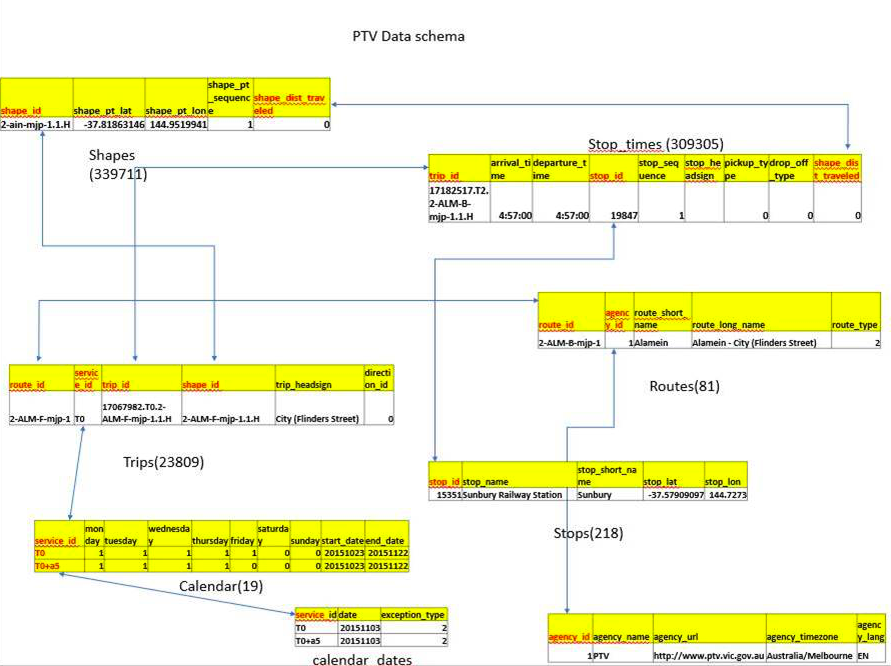

## Getting nearest Train_station_id  and its Distance_to_train_station using PTV data  <a class="anchor" id="sec1.15"></a>


In [53]:
ptvdf_stops.head()

,stop_id,stop_name,stop_short_name,stop_lat,stop_lon
0,15351,Sunbury Railway Station,Sunbury,-37.579091,144.727319
1,15353,Diggers Rest Railway Station,Diggers Rest,-37.627017,144.719922
2,19827,Stony Point Railway Station,Crib Point,-38.374235,145.221837
3,19828,Crib Point Railway Station,Crib Point,-38.366123,145.204043
4,19829,Morradoo Railway Station,Crib Point,-38.354033,145.189602


* Calculating neareast train station from haversine function and ptvdf_stops data frame

In [54]:
###Function for calculating nearest train station from Property lat and lng using PTV dataset for all the stops
def get_nearest_station(row,df):
    r=[[0,0]] ##default values if not found
    dist_dict={}
    for i,rows in df.iterrows():
        dis=haversine(rows['stop_lat'],rows['stop_lon'],row['lat'],row['lng'])
        dist_dict[rows['stop_id']]=dis

    r=[[k,v] for k,v in dist_dict.items() if v==min(dist_dict.values())]
    print(r)
    row['Train_station_id']=r[0][0]
    row['Distance_to_train_station']=r[0][1]
    return row

#### update real_state dataframe with Train_station_id and Distance_to_train_station values calculated with get_nearest_station function

In [55]:
df_real_state=df_real_state.apply((lambda row : get_nearest_station(row,ptvdf_stops)),axis=1)

[[19876, 0.953]]
[[19876, 0.953]]
[[19984, 1.0769]]
[[19878, 2.4522]]
[[19935, 1.4232]]
[[19843, 1.2246]]
[[19915, 1.0976]]
[[20000, 1.273]]
[[19955, 1.6053]]
[[19899, 0.6741]]
[[20002, 4.027]]
[[19961, 1.6113]]
[[20021, 1.2059]]
[[19955, 0.9113]]
[[19924, 1.0407]]
[[19936, 0.6465]]
[[19920, 0.7038]]
[[20023, 0.7251]]
[[20010, 2.6975]]
[[19985, 1.9144]]
[[19953, 1.0172]]
[[20006, 0.9481]]
[[20004, 0.8446]]
[[19869, 2.1654]]
[[19955, 1.4562]]
[[20010, 1.7571]]
[[40221, 2.6731]]
[[19898, 1.2261]]
[[19871, 2.6334]]
[[20009, 1.7042]]
[[19877, 1.5089]]
[[19906, 0.3028]]
[[20008, 2.4557]]
[[20002, 4.1859]]
[[20000, 1.22]]
[[19985, 1.514]]
[[20024, 0.079]]
[[19889, 1.3713]]
[[20009, 0.9405]]
[[19906, 0.967]]
[[40221, 1.4005]]
[[20008, 0.2967]]
[[19906, 1.1199]]
[[20014, 0.085]]
[[19945, 0.8668]]
[[19913, 3.1513]]
[[20012, 1.9768]]
[[19962, 0.4016]]
[[19974, 0.4748]]
[[20001, 3.1795]]
[[19840, 1.7661]]
[[20032, 2.923]]
[[19851, 0.8854]]
[[20009, 0.1317]]
[[19906, 0.6553]]
[[20002, 2.4547]]
[[2

[[40221, 1.2035]]
[[19942, 0.5261]]
[[19961, 1.0291]]
[[20023, 0.726]]
[[19913, 1.8871]]
[[19866, 1.2184]]
[[19865, 2.1624]]
[[19983, 2.3515]]
[[20022, 1.8006]]
[[44817, 2.1744]]
[[19918, 0.8644]]
[[20009, 1.2563]]
[[19913, 1.585]]
[[19866, 0.53]]
[[19888, 2.3647]]
[[19871, 2.5089]]
[[19888, 2.8479]]
[[20041, 0.7989]]
[[19898, 0.9696]]
[[19840, 0.7248]]
[[40221, 3.5891]]
[[19984, 3.7275]]
[[20006, 1.4321]]
[[19931, 0.9837]]
[[45795, 1.4672]]
[[19937, 0.7122]]
[[19866, 0.5736]]
[[19938, 0.5034]]
[[19885, 1.7607]]
[[19877, 2.0135]]
[[19976, 0.1891]]
[[20008, 2.7462]]
[[19872, 1.2388]]
[[19905, 0.7975]]
[[20037, 1.4869]]
[[19949, 1.169]]
[[20005, 2.9838]]
[[19936, 0.6454]]
[[19872, 0.4857]]
[[19888, 1.8089]]
[[46468, 3.1622]]
[[19934, 0.8283]]
[[19931, 0.1993]]
[[19953, 0.7213]]
[[19864, 1.4431]]
[[19865, 1.6166]]
[[19965, 0.4722]]
[[20000, 0.5486]]
[[19899, 1.2086]]
[[20021, 1.0176]]
[[19936, 1.1465]]
[[19849, 0.5677]]
[[20031, 0.8543]]
[[19914, 2.291]]
[[19904, 0.5546]]
[[19951, 0.3298]

[[20041, 0.3135]]
[[19968, 0.873]]
[[19994, 2.3047]]
[[19920, 0.669]]
[[19888, 2.5111]]
[[20001, 3.1507]]
[[19876, 1.5327]]
[[20000, 1.0887]]
[[19918, 0.4682]]
[[46468, 1.5966]]
[[19918, 0.2508]]
[[19936, 0.6509]]
[[20016, 0.4457]]
[[19984, 2.1794]]
[[20033, 1.5681]]
[[19984, 3.1675]]
[[19876, 1.9629]]
[[19914, 3.0034]]
[[19888, 2.4215]]
[[19965, 1.1832]]
[[19858, 0.692]]
[[40221, 1.714]]
[[20002, 2.4334]]
[[19897, 1.1659]]
[[19919, 0.3711]]
[[19867, 3.4632]]
[[19964, 1.098]]
[[19978, 0.5552]]
[[19866, 0.6496]]
[[20030, 2.3288]]
[[19903, 0.3732]]
[[19900, 1.3988]]
[[19913, 2.9977]]
[[20016, 0.5365]]
[[19872, 2.0342]]
[[19893, 0.39]]
[[20007, 3.0582]]
[[19934, 0.2353]]
[[20042, 4.2741]]
[[19996, 0.806]]
[[40221, 2.7938]]
[[20032, 0.9343]]
[[19940, 0.2031]]
[[19865, 1.341]]
[[20005, 1.0611]]
[[40221, 1.4166]]
[[19901, 1.4692]]
[[19890, 2.43]]
[[40220, 2.575]]
[[20015, 1.3963]]
[[19848, 1.696]]
[[19970, 1.2599]]
[[19903, 2.2015]]
[[46468, 2.5303]]
[[19941, 0.7382]]
[[20004, 0.9072]]
[[199

[[20019, 0.439]]
[[19941, 0.6677]]
[[19866, 1.0093]]
[[19871, 3.5334]]
[[19954, 0.7849]]
[[19935, 0.717]]
[[20021, 1.7293]]
[[19868, 3.3722]]
[[19885, 2.1283]]
[[19977, 1.2606]]
[[19840, 2.5119]]
[[19939, 1.258]]
[[20001, 1.5487]]
[[20004, 0.6889]]
[[19865, 2.3525]]
[[20005, 2.6362]]
[[19919, 0.6366]]
[[19851, 0.3238]]
[[19912, 1.2042]]
[[20000, 1.4358]]
[[19863, 0.6319]]
[[19937, 1.0769]]
[[19934, 2.0818]]
[[40220, 3.8761]]
[[20024, 0.3321]]
[[19975, 1.1469]]
[[19984, 0.9091]]
[[19919, 0.5357]]
[[20033, 1.2157]]
[[19986, 1.3925]]
[[20005, 1.5381]]
[[20008, 2.0168]]
[[19851, 1.3354]]
[[19977, 0.3469]]
[[19929, 0.7173]]
[[19849, 2.0875]]
[[20005, 2.9745]]
[[20021, 1.087]]
[[20002, 3.4023]]
[[19950, 0.1642]]
[[19914, 3.4544]]
[[19960, 1.4675]]
[[19988, 2.2229]]
[[20008, 0.2096]]
[[19903, 0.4446]]
[[19933, 2.1869]]
[[19888, 2.3486]]
[[19848, 0.7053]]
[[20003, 1.4008]]
[[19840, 0.8183]]
[[19839, 0.9004]]
[[20003, 1.9689]]
[[19890, 2.4243]]
[[19900, 0.752]]
[[19937, 1.214]]
[[19915, 2.3213]

[[19869, 1.8023]]
[[19986, 4.8595]]
[[19964, 0.7645]]
[[40221, 3.7388]]
[[19926, 0.2355]]
[[20024, 0.2109]]
[[19965, 0.8908]]
[[19952, 0.5963]]
[[19888, 3.1305]]
[[19985, 1.3333]]
[[19862, 0.673]]
[[20002, 2.8788]]
[[19885, 1.8502]]
[[19941, 0.5463]]
[[19899, 0.4009]]
[[19987, 1.726]]
[[40221, 0.8722]]
[[19954, 1.2999]]
[[20005, 0.5933]]
[[20021, 0.3538]]
[[19877, 1.4454]]
[[19837, 0.6961]]
[[19975, 1.6201]]
[[19877, 1.6979]]
[[19901, 0.4047]]
[[19935, 0.6589]]
[[19900, 0.9789]]
[[20011, 0.764]]
[[19899, 0.5481]]
[[19869, 1.1881]]
[[40221, 2.7483]]
[[20042, 3.1936]]
[[19913, 1.0444]]
[[20030, 1.8985]]
[[19969, 0.7694]]
[[20037, 1.6488]]
[[19924, 0.4612]]
[[19915, 1.077]]
[[19902, 0.9314]]
[[19915, 0.6999]]
[[40221, 2.3408]]
[[44817, 0.9887]]
[[19951, 0.8326]]
[[20021, 0.4111]]
[[19871, 0.6078]]
[[19939, 0.7786]]
[[19994, 1.0368]]
[[19986, 0.1067]]
[[19893, 1.8353]]
[[19936, 0.4561]]
[[20001, 3.1159]]
[[19894, 0.7147]]
[[20000, 1.8995]]
[[40221, 0.9365]]
[[40221, 3.56]]
[[20012, 1.2823]

In [56]:
df_real_state.head()

,Property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space,suburb,Shopping_center_id,Distance_to_sc,Hospital_id,Distance_to_hospital,Supermarket_id,Distance_to_supermaket,Train_station_id,Distance_to_train_station
0,66910,-37.752014,145.357590,11 Allison Crescent,2610000,house,2009,3,1,2,LILYDALE,SC_084,3.9025,hospital_151,0.1159,S_233,0.9435,19876,0.9530
1,40625,-37.705989,145.073302,41 Lea Crescent,7910000,house,2015,3,1,3,BUNDOORA,SC_047,5.2404,hospital_037,1.4870,S_155,1.8156,19984,1.0769
2,64646,-37.816775,145.287524,532 Dorset Road,4998000,house,2011,3,1,1,CROYDON SOUTH,SC_022,2.0076,hospital_164,2.9821,S_042,1.4463,19878,2.4522
3,39215,-37.752478,145.045595,365 Waterdale Road,6900000,house,2010,2,1,0,BELLFIELD,SC_001,1.7507,hospital_090,0.7824,S_219,1.7885,19935,1.4232
4,28141,-37.800304,144.975868,18 Cremorne Street,12250000,house,2013,3,2,0,FITZROY,SC_008,1.3901,hospital_129,0.8407,S_200,0.3050,19843,1.2246


In [57]:
#df_real_state.to_csv('real_state1.csv',index=False)####taking a copy after te update of nearest station
#df_real_state=pd.read_csv('real_state1.csv')####using backup in case need to run the program from here

In [58]:
df_real_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2013 entries, 0 to 2012
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Property_id                2013 non-null   int64  
 1   lat                        2013 non-null   float64
 2   lng                        2013 non-null   float64
 3   addr_street                2013 non-null   object 
 4   price                      2013 non-null   int64  
 5   property_type              2013 non-null   object 
 6   year                       2013 non-null   int64  
 7   bedrooms                   2013 non-null   int64  
 8   bathrooms                  2013 non-null   int64  
 9   parking_space              2013 non-null   int64  
 10  suburb                     2013 non-null   object 
 11  Shopping_center_id         2013 non-null   object 
 12  Distance_to_sc             2013 non-null   float64
 13  Hospital_id                2013 non-null   objec

## calculating travel_min_to_CBD and Transfer_flag <a class="anchor" id="sec1.16"></a>


In [59]:
ptvdf_stop_times.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390305 entries, 0 to 390304
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   trip_id              390305 non-null  object 
 1   arrival_time         390305 non-null  object 
 2   departure_time       390305 non-null  object 
 3   stop_id              390305 non-null  int64  
 4   stop_sequence        390305 non-null  int64  
 5   stop_headsign        0 non-null       float64
 6   pickup_type          390305 non-null  int64  
 7   drop_off_type        390305 non-null  int64  
 8   shape_dist_traveled  390217 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 26.8+ MB


* Changing datatype of arrival_time and departure_time to timedelta 

In [60]:
ptvdf_stop_times['arrival_time']=pd.to_timedelta(ptvdf_stop_times['arrival_time'])
ptvdf_stop_times['departure_time']=pd.to_timedelta(ptvdf_stop_times['departure_time'])

In [61]:
ptvdf_stop_times.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
0,17182517.T2.2-ALM-B-mjp-1.1.H,04:57:00,04:57:00,19847,1,NaN,0,0,0.000000
1,17182517.T2.2-ALM-B-mjp-1.1.H,04:58:00,04:58:00,19848,2,NaN,0,0,723.017818
2,17182517.T2.2-ALM-B-mjp-1.1.H,05:00:00,05:00:00,19849,3,NaN,0,0,1951.735072
3,17182517.T2.2-ALM-B-mjp-1.1.H,05:02:00,05:02:00,19850,4,NaN,0,0,2899.073349
4,17182517.T2.2-ALM-B-mjp-1.1.H,05:04:00,05:04:00,19851,5,NaN,0,0,3927.090952


In [62]:
ptvdf_stop_times.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390305 entries, 0 to 390304
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype          
---  ------               --------------   -----          
 0   trip_id              390305 non-null  object         
 1   arrival_time         390305 non-null  timedelta64[ns]
 2   departure_time       390305 non-null  timedelta64[ns]
 3   stop_id              390305 non-null  int64          
 4   stop_sequence        390305 non-null  int64          
 5   stop_headsign        0 non-null       float64        
 6   pickup_type          390305 non-null  int64          
 7   drop_off_type        390305 non-null  int64          
 8   shape_dist_traveled  390217 non-null  float64        
dtypes: float64(2), int64(4), object(1), timedelta64[ns](2)
memory usage: 26.8+ MB


#### Finding the stop id of Flinder to calculate the travel time to cbd and transfer flag 

In [63]:
ptvdf_stops[ptvdf_stops.stop_name.str.contains('Flinder')]

,stop_id,stop_name,stop_short_name,stop_lat,stop_lon
29,19854,Flinders Street Railway Station,Melbourne City,-37.818305,144.966964


* Creating a df "df_flinder_trips to find flinder station where  tripid contains: "t0"schedule that runs on all days that is monday to friday/ weekdays. 

In [64]:
df_flinder_trips=ptvdf_stop_times[(ptvdf_stop_times.stop_id==19854)& (ptvdf_stop_times.trip_id.str.contains('T0'))]
df_flinder_trips

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
9487,17068379.T0.2-ALM-F-mjp-1.2.H,06:13:00,06:13:00,19854,18,NaN,0,0,19128.315379
9504,17068398.T0.2-ALM-F-mjp-1.2.H,09:43:00,09:43:00,19854,18,NaN,0,0,19128.315379
9521,17068399.T0.2-ALM-F-mjp-1.2.H,09:58:00,09:58:00,19854,18,NaN,0,0,19128.315379
9538,17068381.T0.2-ALM-F-mjp-1.2.H,06:42:00,06:42:00,19854,18,NaN,0,0,19128.315379
9555,17068383.T0.2-ALM-F-mjp-1.2.H,06:58:00,06:58:00,19854,18,NaN,0,0,19128.315379
...,...,...,...,...,...,...,...,...,...
389620,17071207.T0.2-WMN-F-mjp-1.5.R,16:40:00,16:40:00,19854,1,NaN,0,0,0.000000
389631,17071209.T0.2-WMN-F-mjp-1.5.R,17:03:00,17:03:00,19854,1,NaN,0,0,0.000000
389642,17071211.T0.2-WMN-F-mjp-1.5.R,17:25:00,17:25:00,19854,1,NaN,0,0,0.000000
389653,17071213.T0.2-WMN-F-mjp-1.5.R,17:47:00,17:47:00,19854,1,NaN,0,0,0.000000


#### Function for Flinders Street station to find travel time and transfer flag 

In [65]:
##Function to calcuate travel time to Flindersteet station and set the transfer flag if no direct trip
def find_travel_time(row):
    t_min=0 ##default value if not found
    t_flag=1
    tmp_df=ptvdf_stop_times[(ptvdf_stop_times.stop_id==row.Train_station_id)& (ptvdf_stop_times.trip_id.str.contains('T0'))  & 
                  (ptvdf_stop_times.departure_time > '7 hour') & (ptvdf_stop_times.departure_time < '9 hour')]
    mask=tmp_df['trip_id'].isin(df_flinder_trips.trip_id)
    if True in mask.values:
        merge= pd.merge(tmp_df,df_flinder_trips,on='trip_id')
        merge['diff']=merge['departure_time_y']-merge['departure_time_x']
        t_min=pd.to_timedelta(int(merge.loc[(merge['diff']> '0 sec'),['diff']].mean().values)) #,unit='ns')
        #t_min=t_min.floor('S')
        t_min=(t_min.seconds//60)%60 ###covertig to minutes 
        t_flag=0
    print(row.addr_street)
    print(t_min)
    print(t_flag)
    row['travel_min_to_CBD']=t_min
    row['Transfer_flag']=t_flag
    return row

#### update real_state dataframe with travel_min_to_CBD and Transfer_flag values calculated with find_travel_time function

In [66]:
df_real_state=df_real_state.apply((lambda row : find_travel_time(row)),axis=1)

11 Allison Crescent
59
0
11 Allison Crescent
59
0
41 Lea Crescent
34
0
532 Dorset Road
50
0
365 Waterdale Road
27
0
18 Cremorne Street
8
0
15 Coombs Avenue
38
0
28 Chittenup Bend
39
0
43 Ormond Esplanade
15
0
27 O'Shannessy Street
36
0
18 Narooma Avenue
33
0
46 Volga Street
35
0
115 South Road
25
0
2 Dryden Street
15
0
56 Point Cook Rd
30
0
14 Adamson Street
28
0
35 Holywood Grove
28
0
22 Wales Street
19
0
33 Clingin Street
32
0
159 Plenty River Drive
38
0
33 Foote Street
19
0
85 Derrick Street
40
0
32 Burnewang Street,
28
0
19 Southey Road
53
0
359 Barkly Street
15
0
14 Gill Street
32
0
8 Jirrahlinga Terrace
46
0
29 Rosalind Crescent
35
0
13 Chelsea Court
45
0
54 Banbury  Road
33
0
47 Churchill Way
54
0
15 Crimea Street
12
0
8 Madison Court
36
0
8 Pilbara Avenue
33
0
9 Mankina Circuit
39
0
212 Elder Street
38
0
100 Victoria Street
17
0
14 Currawong Street
50
0
123 Cheddar Road
33
0
28/69 Palmer Street
12
0
24 Axminster Drive
46
0
5 Hughes Parade
36
0
43 Murphy Street
12
0
2 Ethel Stre

42 Wells Road
40
0
14 Livingstone Parade
25
0
20 Peppertree Street
50
0
148 Woods Street
20
0
7 Balgonie Place
20
0
8 Mark Court
27
0
9 Joffre Street
50
0
233 Widford Street
36
0
7 Laha Crescent
29
0
18 Adeline Street
25
0
6 Myna Street
43
0
10 Arden Crescent
28
0
6 Millicent Avenue
22
0
6 Narong Crescent
53
0
32 Grevillea Street
46
0
9 Alawara Drive
54
0
3 John August Walk
32
0
8 Glenmer Street
38
0
41 Burbank Drive
36
0
11 KILBERRY CRES
58
0
1 Fetlock Place
46
0
45 Hamilton Street
14
0
16 Byron Road
54
0
21 Ambon  Street
36
0
72 Ruskin Street
15
0
20 Mena Avenue
37
0
33 Stanhope Street
44
0
90 Wantirna Road
43
0
10 Avon Avenue
41
0
48 Outlook Drive
33
0
222a Warrigal Road
40
0
79 Banksia Street
27
0
5 Mintleaf Grove
39
0
135 Smith Street
23
0
78 Hedge End Road
39
0
63 Pultney Street
53
0
9 Coolamon Street
28
0
30 Hillside Street
43
0
9 Marga Place
47
0
16 Chesterfield Road
31
0
13 Valley View Court
59
0
9 Murray Street
38
0
1/23 Clements Grove
33
0
35 McCracken Avenue
20
0
41 Silver 

2 Silverdale Walk
31
0
3/159 Grimshaw Street
38
0
1A Helena Road
59
0
6 Milton Street
38
0
365 Boronia Road
49
0
2 Redfern Court
53
0
11 Hutchison Avenue
40
0
9 Delta Close
59
0
1/24 Berrima Road
28
0
90 Wright Street
25
0
36 Camelot Drive
33
0
21 May Road
20
0
2/40 Dunbarton Drive
45
0
64 The Grove
26
0
54 Boberrit Wynd
39
0
7 Reedy Court
58
0
682 High Street
22
0
30 Wattle Valley Road
41
0
35 Smith Street
13
0
9 Blanton Drive
48
0
400 Cardigan Street
8
0
1 Bowood Court
30
0
37 Packington Street
11
0
45 Foley Avenue
23
0
1 Wahroongaa Crescent
29
0
18 Station Road
40
0
24 Laver Street
18
0
2/87 Herbert Street
53
0
4 Gladstone Street
20
0
1 Ronald Crescent
53
0
11 Lara Court
58
0
6 Elgin Avenue
22
0
16a Coleridge Street
20
0
67 Castlemaine Street
15
0
120 Canning Street
8
0
164 Mckinnon Road
36
0
734 PASCOE VALE ROAD
32
0
20 Mclean Street
28
0
5 Kelvin Avenue
40
0
6 Haileybury Court
49
0
4 Justin Court
40
0
2/11 Hilda Street
40
0
15 Inverness Street
38
0
4 Old Gippsland Road
59
0
9 Gilm

18 Pyalong Crescent
39
0
6 Stanhope Street
36
0
19 Wakool Avenue
40
0
13 Doris Street
34
0
4 Trentham Court
45
0
1 Dundee Way
39
0
162 Balcombe Road
40
0
12 Victoria Road
49
0
46 Dunbarton Drive
45
0
6 Tedburn Court
46
0
61 Davies Street
28
0
41 Mascoma Street
27
0
30 Grevillea Street
46
0
12 Munro St
17
0
67 Pecham Street
34
0
1/26 Reno Road
29
0
15 Golf Avenue
33
0
38 Wattle  Road
18
0
13 Lock Street
33
0
22 Hope Street
27
0
13 Dickens Street
35
0
6 Reece Court
59
0
115 Wales Street
15
0
49 Margaret Street
54
0
9 Trinian Street
39
0
4  Norma Street
35
0
60 Electric Street
34
0
16 Myrtle Road
27
0
4 Heysen Court
54
0
45 Childers Street
21
0
19 Malcolm Crescent
50
0
14 Greig Street
14
0
6 Phillip Avenue
43
0
400 Cardigan Street
8
0
9 Balcombe Park Lane
37
0
11 Linda Street
26
0
73 Blackwood Street
15
0
5 Mawson Court
41
0
10 Sutherland Street
23
0
10 Middle Road
16
0
34 Alfred Street
22
0
4 Densham Way
46
0
19 Patty Street
40
0
37 Gold Street
11
0
88 Orient Avenue
41
0
22 Keith Crescen

20 Brinawa Drive
38
0
17 Roslyn Street
27
0
21 Brendan Avenue
30
0
8 Aminya Crescent
40
0
24 Wilkinson Crescent
26
0
38 Timele Drive
39
0
67 Walter Street
17
0
2 Stewart Street
29
0
13 Natya Court
36
0
53 Moonee Boulevard
34
0
1 Parkhill Drive
27
0
38 Hotham Street
14
0
20 Larnook Crescent
54
0
55 Charlotte Street
20
0
1337 High Street
14
0
26 Lemal Avenue
49
0
82 Fromer Street
38
0
50 Orange Grove
49
0
LOT/2363 Hilderstone Avenue
43
0
7 Wallen Road
35
0
6 Parry Drive
54
0
15 Deborah Avenue
53
0
22 Glencairn Avenue
46
0
1 Zulu Close
59
0
26 Regent Street
33
0
54 Banool Road
33
0
19 Derwent Place
34
0
287 Plenty Road
25
0
33 Smith Avenue
54
0
5 Raleigh Street
23
0
90 Watt Street
18
0
41 Cameron Street
29
0
84 Maxweld Street
28
0
45 Murphy Street
12
0
8 Shiraz Court
34
0
4 Basalt Court
36
0
25 Scottsdale Court
46
0
23 Pommel Crescent
46
0
61 Kingsclere Avenue
50
0
9 Beatty Street
26
0
77 Allister Avenue
55
0
54 Mater Street
11
0
131 New Street
22
0
25 Bamfield Street
29
0
14 Girgarre Str

61 Gamon Street
14
0
13 Anne Street
36
0
85 Ruskin Street
15
0
24 Wills Street
21
0
950 Toorak Road
16
0
29 Liberty Parade
23
0
29 Freeman Street
15
0
3/10 Clyde Street
59
0
1 Oxford Court
26
0
26 Liverpool Circuit
46
0
9 William Hovell Pass
46
0
40 Edinburgh Street
12
0
8 Coromandel Crescent South
55
0
5 Sugargum Grove
33
0
26 Melbourne Avenue
32
0
24 Howden Crescent
25
0
39 Riddell Street
36
0
39 Warralong Avenue
34
0
91 Leila Road
35
0
99 New Street
41
0
45 Duncan Street
29
0
1 Waterford Terrace
48
0
5 Sonia Court
39
0
19 Mercedes Street
36
0
17 Lane Crescent
32
0
8A  Middle Crescent
20
0
118 Gatehouse Street
18
0
46 McClares Road
36
0
23 Valentine Grove
20
0
2/4 Field Street
46
0
37 Boston Road
34
0
26 Yarravale Road
18
0
8 Montana Avenue
53
0
19 Mandella Street
40
0
13 Kerferd Street
30
0
25 Dalwhinnie Crescent
46
0
71 Blyth Street
30
0
109 Buckley Street
17
0
41 Murray Street
28
0
30 William Street
20
0
10 Karo Court
53
0
185 St Helena Road
38
0
1 Tarongo Drive
47
0
2 Grassy Poin

In [67]:
df_real_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2013 entries, 0 to 2012
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Property_id                2013 non-null   int64  
 1   lat                        2013 non-null   float64
 2   lng                        2013 non-null   float64
 3   addr_street                2013 non-null   object 
 4   price                      2013 non-null   int64  
 5   property_type              2013 non-null   object 
 6   year                       2013 non-null   int64  
 7   bedrooms                   2013 non-null   int64  
 8   bathrooms                  2013 non-null   int64  
 9   parking_space              2013 non-null   int64  
 10  suburb                     2013 non-null   object 
 11  Shopping_center_id         2013 non-null   object 
 12  Distance_to_sc             2013 non-null   float64
 13  Hospital_id                2013 non-null   objec

In [68]:
df_real_state.describe()

,Property_id,lat,lng,price,year,bedrooms,bathrooms,parking_space,Distance_to_sc,Distance_to_hospital,Distance_to_supermaket,Train_station_id,Distance_to_train_station,travel_min_to_CBD,Transfer_flag
count,2013.000000,2013.000000,2013.000000,2.013000e+03,2013.000000,2013.000000,2013.000000,2013.00000,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000
mean,48307.422752,-37.804713,145.042938,8.998119e+06,2012.343766,3.216592,1.573274,1.53999,2.559434,2.275068,1.370803,21274.341282,1.405287,33.641828,0.002484
std,28241.643455,0.100309,0.138500,5.746161e+06,2.588792,0.764380,0.616394,0.80073,1.361865,1.806365,0.648175,5275.728969,0.953466,12.525298,0.049789
min,30.000000,-38.073650,144.634511,1.060000e+06,2005.000000,1.000000,1.000000,0.00000,0.121000,0.071400,0.096900,19837.000000,0.068800,0.000000,0.000000
25%,24481.000000,-37.866608,144.939847,5.013000e+06,2010.000000,3.000000,1.000000,1.00000,1.471900,1.043800,0.852000,19890.000000,0.688900,25.000000,0.000000
50%,48155.000000,-37.800458,145.035980,7.395000e+06,2013.000000,3.000000,2.000000,2.00000,2.297800,1.748800,1.312900,19949.000000,1.171000,34.000000,0.000000
75%,73026.000000,-37.735482,145.125641,1.098500e+07,2015.000000,4.000000,2.000000,2.00000,3.467900,2.930900,1.822200,20005.000000,1.941400,43.000000,0.000000
max,97078.000000,-37.571164,145.368936,4.556000e+07,2016.000000,5.000000,3.000000,3.00000,5.962200,9.270700,2.962100,46468.000000,4.904500,59.000000,1.000000


In [69]:
df_real_state[(df_real_state.Transfer_flag==1)]

,Property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space,...,Shopping_center_id,Distance_to_sc,Hospital_id,Distance_to_hospital,Supermarket_id,Distance_to_supermaket,Train_station_id,Distance_to_train_station,travel_min_to_CBD,Transfer_flag
918,11481,-37.781162,144.885457,48 Pridham Street,7900000,house,2010,3,1,3,...,SC_085,0.9249,hospital_003,1.2737,S_049,0.9467,20027,2.0599,0,1
1348,1833,-37.778568,144.880066,15 Smith Street,7520000,house,2008,3,2,2,...,SC_052,0.8184,hospital_056,1.7085,S_049,1.0041,20027,2.6052,0,1
1372,11364,-37.774500,144.880615,31 Cavalry Circuit,5040000,house,2012,2,1,1,...,SC_052,0.4947,hospital_003,2.1110,S_049,0.7723,20027,2.7624,0,1
1652,2295,-37.779085,144.880680,45 Lindenow Street,8550000,house,2010,2,2,2,...,SC_052,0.8340,hospital_056,1.6372,S_049,0.9980,20027,2.5339,0,1
1906,11487,-37.786584,144.891693,5 Eveline Avenue,6400000,house,2016,4,2,2,...,SC_085,1.4774,hospital_003,0.6678,S_049,1.5055,20027,1.4001,0,1


In [70]:
df_real_state.head()

,Property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space,...,Shopping_center_id,Distance_to_sc,Hospital_id,Distance_to_hospital,Supermarket_id,Distance_to_supermaket,Train_station_id,Distance_to_train_station,travel_min_to_CBD,Transfer_flag
0,66910,-37.752014,145.357590,11 Allison Crescent,2610000,house,2009,3,1,2,...,SC_084,3.9025,hospital_151,0.1159,S_233,0.9435,19876,0.9530,59,0
1,40625,-37.705989,145.073302,41 Lea Crescent,7910000,house,2015,3,1,3,...,SC_047,5.2404,hospital_037,1.4870,S_155,1.8156,19984,1.0769,34,0
2,64646,-37.816775,145.287524,532 Dorset Road,4998000,house,2011,3,1,1,...,SC_022,2.0076,hospital_164,2.9821,S_042,1.4463,19878,2.4522,50,0
3,39215,-37.752478,145.045595,365 Waterdale Road,6900000,house,2010,2,1,0,...,SC_001,1.7507,hospital_090,0.7824,S_219,1.7885,19935,1.4232,27,0
4,28141,-37.800304,144.975868,18 Cremorne Street,12250000,house,2013,3,2,0,...,SC_008,1.3901,hospital_129,0.8407,S_200,0.3050,19843,1.2246,8,0


In [71]:
df_real_state.describe(include=['O'])

,addr_street,property_type,suburb,Shopping_center_id,Hospital_id,Supermarket_id
count,2013,2013,2013,2013,2013,2013
unique,1974,1,168,63,117,129
top,23 Arthur Street,house,CRAIGIEBURN,SC_103,hospital_104,S_201
freq,3,2013,83,93,140,69


# Finished file <a class="anchor" id="sec1.17"></a> 

#### Task 1 completed

In [72]:
df_real_state.to_csv('28130006_A3_solution.csv',index=False)

# Task 2: data reshaping  <a class="anchor" id="sec2.1"></a>
In this task, you need to study the effect of different normalization/transformation methods (i.e. standardization, minmax normalization, log, power, box-cox transformation) on the  “price” , “Distance_to_sc”, “travel_min_to_CBD” , and  “Distance_to_hospital” attributes and observe and explain their effect assuming  we want to develop a linear model to predict the “price” using “Distance_to_sc”, “travel_min_to_CBD”, and “Distance_to_hospital” attributes.


In [73]:
from scipy.stats import norm
from sklearn import preprocessing
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

#### Analysis the Features to be used for data reshaping
we will create a new dataframe "lm_fitting_df" from the main Dataframe "df_real_state" with the required features 
'Distance_to_sc','travel_min_to_CBD', 'Distance_to_hospital','price'. Where Preice being the target variable and 'Distance_to_sc','travel_min_to_CBD', 'Distance_to_hospital','price' are Predictor for developing the Linearmodel

In [74]:
features=['Distance_to_sc','travel_min_to_CBD', 'Distance_to_hospital','price']
features

['Distance_to_sc', 'travel_min_to_CBD', 'Distance_to_hospital', 'price']

In [75]:
lm_fitting_df=df_real_state[features]
lm_fitting_df

,Distance_to_sc,travel_min_to_CBD,Distance_to_hospital,price
0,3.9025,59,0.1159,2610000
1,5.2404,34,1.4870,7910000
2,2.0076,50,2.9821,4998000
3,1.7507,27,0.7824,6900000
4,1.3901,8,0.8407,12250000
...,...,...,...,...
2008,0.8068,11,0.3398,16100000
2009,4.7585,36,1.0185,8075000
2010,1.1334,39,1.2607,4260000
2011,1.8725,6,1.1086,7560000


In [76]:
lm_fitting_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2013 entries, 0 to 2012
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Distance_to_sc        2013 non-null   float64
 1   travel_min_to_CBD     2013 non-null   int64  
 2   Distance_to_hospital  2013 non-null   float64
 3   price                 2013 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 63.0 KB


### Scaling <a class="anchor" id="sec2.2"></a> 
#### Analysis the impact of scaling on linear model can be check the coefficient of variants which means how the predicted varitable will impact predections on traget variable.In this assignment we will be looking at two types of scaling Z-score and MinMax for the normalisation 

#### Firstly we will be checking whats the current coefficients valuation of predicted variaables/features

In [77]:
linearRegressor = LinearRegression()
linearRegressor.fit(lm_fitting_df[[x for x in lm_fitting_df.columns if x != 'price']],lm_fitting_df['price'])
list(zip(features, linearRegressor.coef_))

[('Distance_to_sc', -293232.82884338085),
 ('travel_min_to_CBD', -107159.6269603227),
 ('Distance_to_hospital', -686188.6928560749)]

without doing any normalization or scaling the huge diffrenace between each coefients that can impact the prediction using Linear model . higher coefficent variables will have more impact as compare to the one with less values.

####  Z-Score Normalisation (standardisation): 
We use scikit-learn linrary for standardise data (mean=0, SD=1). The class you are going to use is the StandardScaler class. And how it can make the linear model better by looking into the coefficient values diffrenaces.
We try to bring all the variables or features to a  similar scale. standarisation means centering the variable at zero. z=(x-x_mean)/std

In [78]:
std_scale = preprocessing.StandardScaler().fit(lm_fitting_df)
df_std = std_scale.transform(lm_fitting_df) # an array not a df
df_std[0:5]

array([[ 0.98644109,  2.02505949, -1.1956083 , -1.11199581],
       [ 1.96908783,  0.02860298, -0.43638144, -0.18941162],
       [-0.40530515,  1.30633515,  0.39150864, -0.69631071],
       [-0.59399036, -0.53040484, -0.82654354, -0.36522483],
       [-0.85884006, -2.04771178, -0.79426075,  0.56606298]])

In [79]:
linearRegressor.fit(df_std[:,:3],df_std[:,-1:])

LinearRegression()

In [80]:
coef=linearRegressor.coef_
list1 = coef.tolist()
list1[0]

[-0.0694974651099136, -0.23358313598639555, -0.21571048618715638]

In [81]:
list(zip(features, list1[0]))

[('Distance_to_sc', -0.0694974651099136),
 ('travel_min_to_CBD', -0.23358313598639555),
 ('Distance_to_hospital', -0.21571048618715638)]

This shows that doing Z-Score Normalisation (standardisation) have reduce the differance between each coefficient. howvere lets try using Min-Max scaling and check what further it can bring down.

###  MinMax Noramlisation: <a class="anchor" id="sec2.3"></a>
We'll process the same data we used in the previous section and we will implement using Scikit-Learn MinMaxScaler. And how it can make the linear model better by looking into the coefficient values differances.
Min Max Scaling scales the values between 0 to 1. X_scaled = (X - X.min / (X.max - X.min)

In [82]:
minmax_scale = preprocessing.MinMaxScaler().fit(lm_fitting_df)
df_minmax = minmax_scale.transform(lm_fitting_df)
df_minmax[0:5]

array([[0.6473841 , 1.        , 0.00483732, 0.03483146],
       [0.8764295 , 0.57627119, 0.15388127, 0.15393258],
       [0.32298158, 0.84745763, 0.31640451, 0.08849438],
       [0.27900089, 0.45762712, 0.07728849, 0.13123596],
       [0.217267  , 0.13559322, 0.08362593, 0.25146067]])

In [83]:
linearRegressor.fit(df_minmax[:,:3],df_minmax[:,-1:])

LinearRegression()

In [84]:
coef=linearRegressor.coef_
list1 = coef.tolist()
list1[0]

[-0.03849059774921247, -0.1420768087788549, -0.14185293577957056]

In [85]:
list(zip(features, list1[0]))

[('Distance_to_sc', -0.03849059774921247),
 ('travel_min_to_CBD', -0.1420768087788549),
 ('Distance_to_hospital', -0.14185293577957056)]

#### Min MAx scalling can have better linear model for predicting the price and each predcited variables will be almost equal impact on the prediction of the Price.

### Data Transformation <a class="anchor" id="sec2.4"></a>
Another way to reshape data is to perform data transformation. The data that is with right skew (positive skew). We will need to compress large values.
in this section we can use multiple transformation techniques that are best fit relevant to the skewness of the data.
Firstly we will analysis the data recieved with features.

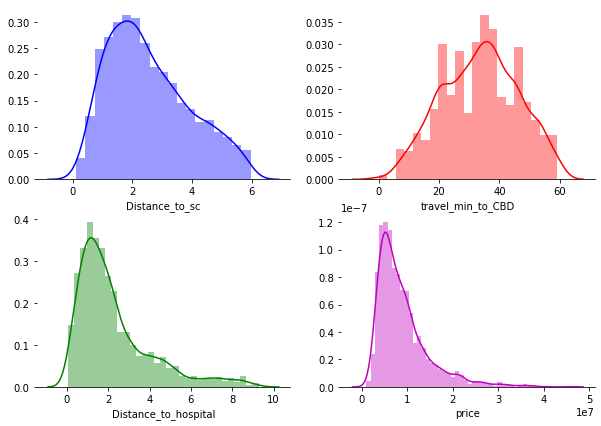

In [86]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from scipy.stats import norm

f, axes = plt.subplots(2, 2, figsize=(10, 7))
sns.despine(left=True)
sns.distplot(lm_fitting_df.Distance_to_sc, color="b", ax=axes[0, 0])
sns.distplot(lm_fitting_df.travel_min_to_CBD, color="r", ax=axes[0, 1])
sns.distplot(lm_fitting_df.Distance_to_hospital, color="g", ax=axes[1, 0])
sns.distplot(lm_fitting_df.price, color="m", ax=axes[1, 1])

#### Applying log Transformation to Price to fix the right Skewness

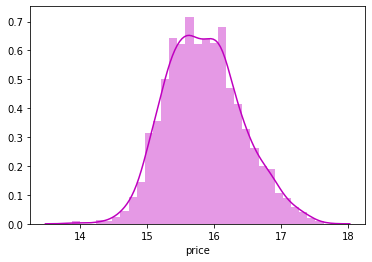

In [87]:
#np.log(lm_fitting_df.price).hist(bins=20)
sns.distplot(np.log(lm_fitting_df.price), color="m")

#### Applying Sqrt Transformation to fix the skewness of Distance_to_hospital and Distance_to_sc

<ipython-input-88-27b4498d817a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lm_fitting_df['Distance_to_hospital_sqrt'] = None


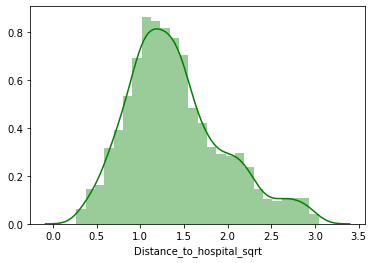

In [88]:
import math
lm_fitting_df['Distance_to_hospital_sqrt'] = None
i = 0
for row in lm_fitting_df.iterrows():
    lm_fitting_df['Distance_to_hospital_sqrt'].at[i] = math.sqrt(lm_fitting_df["Distance_to_hospital"][i])
    i += 1
    
#lm_fitting_df.head()
sns.distplot(lm_fitting_df.Distance_to_hospital_sqrt, color="g")

<ipython-input-89-9d28298f8c2c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lm_fitting_df['Distance_to_sc_sqrt'] = None


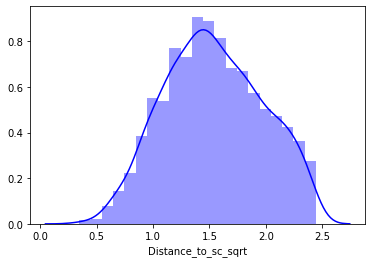

In [89]:
import math
lm_fitting_df['Distance_to_sc_sqrt'] = None
i = 0
for row in lm_fitting_df.iterrows():
    lm_fitting_df['Distance_to_sc_sqrt'].at[i] = math.sqrt(lm_fitting_df["Distance_to_sc"][i])
    i += 1

    
#lm_fitting_df.head()
sns.distplot(lm_fitting_df.Distance_to_sc_sqrt, color="b")

## Linearity <a class="anchor" id="sec2.5"></a>
Firstly we will be checking the Linear relations with Target and predictors from the Orgional data

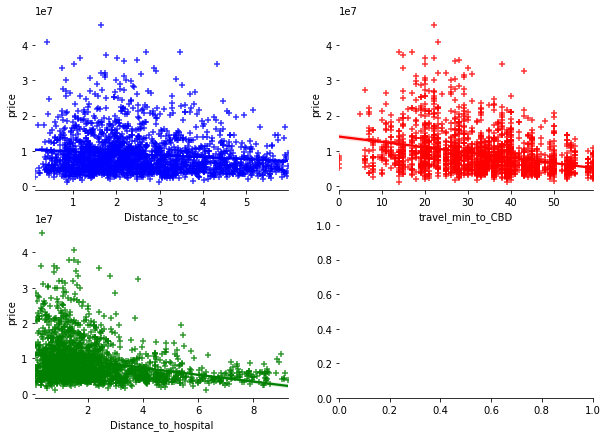

In [90]:
f, axes = plt.subplots(2, 2, figsize=(10, 7))
sns.despine(left=True)
sns.regplot(x=lm_fitting_df.Distance_to_sc, y=lm_fitting_df.price, color="b",marker='+', ax=axes[0, 0])
sns.regplot(lm_fitting_df.travel_min_to_CBD, y=lm_fitting_df.price, color="r", marker='+',ax=axes[0, 1])
sns.regplot(x=lm_fitting_df.Distance_to_hospital,y=lm_fitting_df.price, color="g",marker='+', ax=axes[1, 0])

#### As the Price is more right skewed data we can use log transformation to check the impact on Linearity 

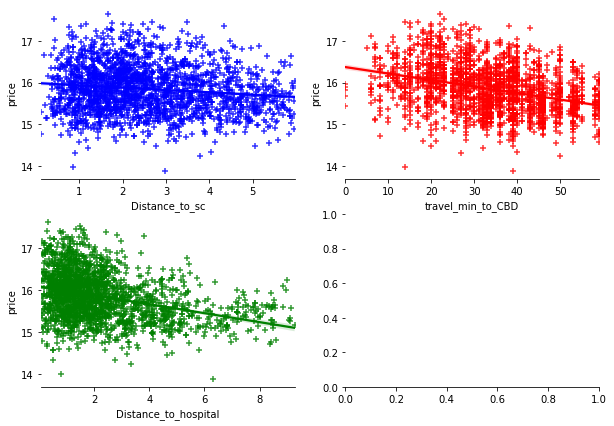

In [91]:
f, axes = plt.subplots(2, 2, figsize=(10, 7))
sns.despine(left=True)
sns.regplot(x=lm_fitting_df.Distance_to_sc, y=np.log(lm_fitting_df.price), color="b",marker='+', ax=axes[0, 0])
sns.regplot(lm_fitting_df.travel_min_to_CBD, y=np.log(lm_fitting_df.price), color="r", marker='+',ax=axes[0, 1])
sns.regplot(x=lm_fitting_df.Distance_to_hospital,y=np.log(lm_fitting_df.price), color="g",marker='+', ax=axes[1, 0])

#### we can also use Box-Cox Transformation to all the variaables which can choose the best fitted lambda and make the relationship more linear
for box-cox we also need to ensure the values are positive , hence we need to choose the travel time default values that were set in Task1. so Box-cox transformation can work

In [92]:
#lm_fitting_df=lm_fitting_df[(lm_fitting_df.travel_min_to_CBD>0)]
pt=preprocessing.PowerTransformer(method='box-cox',standardize=False)
mat=pt.fit_transform(lm_fitting_df.loc[(lm_fitting_df.travel_min_to_CBD>0),features])
mat[:5]

array([[ 1.83765858, 47.00523661, -1.79860318,  5.67035236],
       [ 2.39392076, 27.68036922,  0.41070808,  5.76634816],
       [ 0.80978284, 40.12773498,  1.20283332,  5.72865122],
       [ 0.63142877, 22.11769284, -0.24024856,  5.75541847],
       [ 0.35326927,  6.38500604, -0.17093936,  5.79978216]])

In [93]:
bc=pd.DataFrame(mat,columns=features)
bc.head()

,Distance_to_sc,travel_min_to_CBD,Distance_to_hospital,price
0,1.837659,47.005237,-1.798603,5.670352
1,2.393921,27.680369,0.410708,5.766348
2,0.809783,40.127735,1.202833,5.728651
3,0.631429,22.117693,-0.240249,5.755418
4,0.353269,6.385006,-0.170939,5.799782


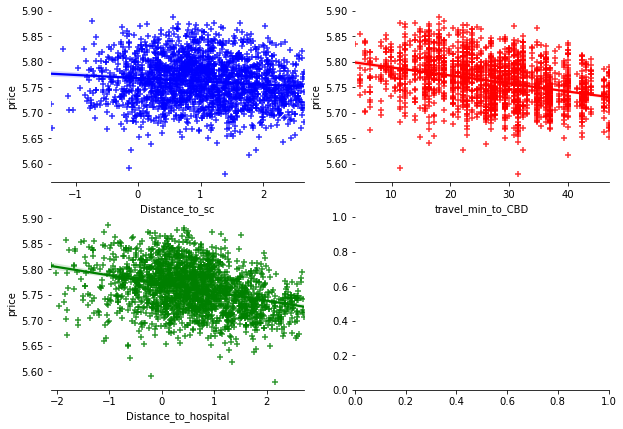

In [94]:
f, axes = plt.subplots(2, 2, figsize=(10, 7))
sns.despine(left=True)
sns.regplot(x=bc.Distance_to_sc, y=bc.price, color="b",marker='+', ax=axes[0, 0])
sns.regplot(bc.travel_min_to_CBD, y=bc.price, color="r", marker='+',ax=axes[0, 1])
sns.regplot(x=bc.Distance_to_hospital,y=bc.price, color="g",marker='+', ax=axes[1, 0])

###  Using Box-Cox Trasformation the Linearity is much better than previously noticed on the orgional data

## Bibliogrophy  <a class="anchor" id="sec2.6"></a>

1. Parse PDF with Tabula. retrieved from. https://aegis4048.github.io/parse-pdf-files-while-retaining-structure-with-tabula-py
2. Tabula Pandas. Retrieved from. https://hackersandslackers.com/data-from-pdfs-tabula-pandas/ 

3. Haversine Function. Retrieved from. https://stackoverflow.com/questions/61598857/looping-through-python-lat-lon-coords-using-haversine-formula
4. Tutorial 11. Monash University. FIT196 Data Wrangling. 